In [6]:
import os
import fontforge
import time
from shutil import copy
import pickle

In [6]:
files = os.listdir('../dataset/fonts/')

In [7]:
#for f in files:
    #print f
#    font = fontforge.open('../dataset/fonts/' + f)
#    for g in font.glyphs():
#        g.export('../dataset/font_imgs/' + f + '_' + g.font.fontname + '_' + hex(g.unicode) + '.png')

In [8]:
FI_DIR = '../dataset/font_imgs/'

In [9]:
fi_files = os.listdir(FI_DIR)

In [7]:
import cv2
import numpy as np

In [11]:
names = []
images = []
for fi in fi_files:
    img = cv2.imread(FI_DIR + fi, 0)
    images.append(img)
    names.append(fi)

In [12]:
char_imgs = []
char_names = []
for i in range(len(images)):
    if np.count_nonzero(images[i]) < images[i].shape[0] * images[i].shape[1]:
        char_imgs.append(images[i])
        char_names.append(names[i])

In [13]:
print len(images), len(char_imgs)

26708 25176


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
size_maps = {}

In [16]:
for image in char_imgs:
    if image.shape not in size_maps:
        size_maps[image.shape] = [image]
    else:
        size_maps[image.shape] += [image]

In [17]:
len(size_maps.keys())

144

In [353]:
#sms = size_maps.keys()
#for i in range(0, len(sms), 8):
#    fig = plt.figure(figsize=(10,20))
#    for j in range(8):
#        ax = fig.add_subplot(1, 8, j+1)
#        ax.imshow(size_maps[sms[i + j]][0], cmap='gray')

In [37]:
from skimage.measure import compare_ssim as ssim

In [58]:
resized_char_imgs = []

for ci in char_imgs:
    resized_char_imgs.append(cv2.resize(ci, (28,28)))

In [59]:
len(resized_char_imgs)

25176

In [10]:
cleaned_dir = '../dataset/cleaned/'

In [11]:
chars = os.listdir(cleaned_dir)
chars.sort()

# % & ' ( ) * + , - 0 1 2 3 4 5 6 7 8 9

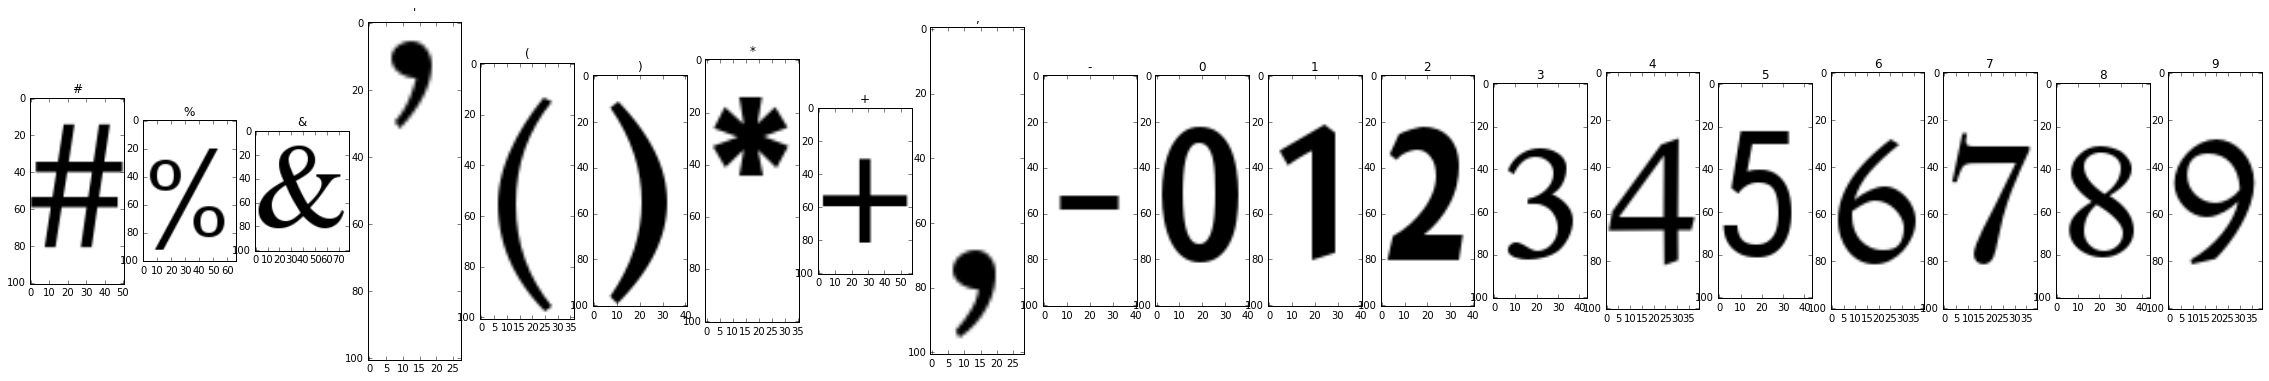


: = ? @ अ ् ड्ड ण् न्न् ब् भ् च् क्ष् च्च च्य द्द ध् ध्द ढ्ढ ग्

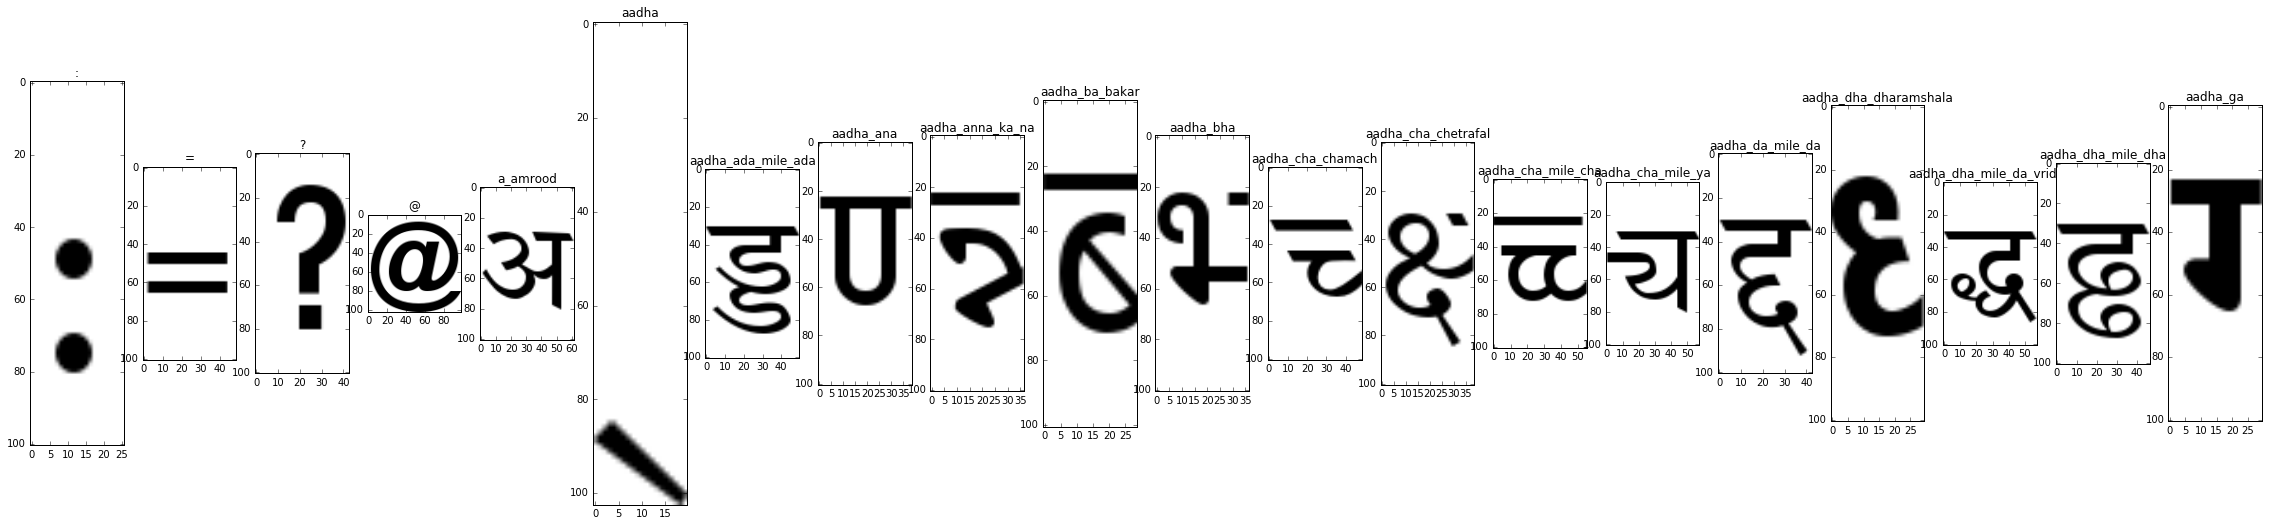


घ् घ्द ज्ञ ह् ह्न ह्व ह्य ज् ज्ज् झ् ज्ञ् क् क्क ख् श्र् ळ् ल्ल म् ह्म न्

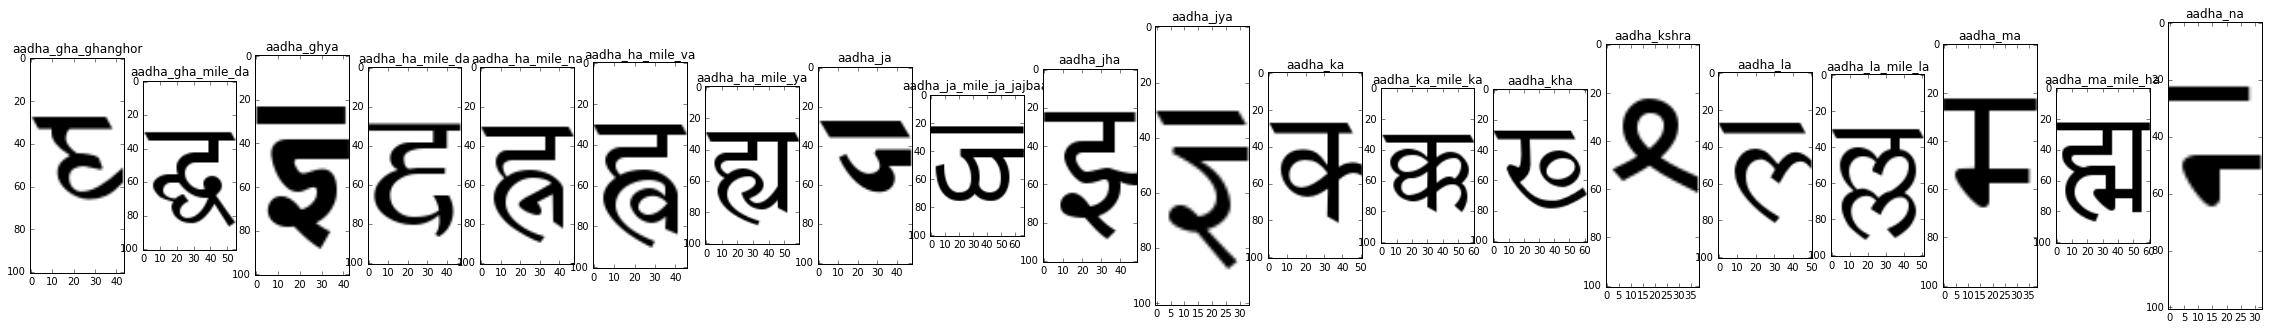


न्न न्त प् प्त् फ् ्र प्र् द्र ग्र् क्र प्र स् स्त्र ष्ठ श्र्च् श् ष्ट ष् N त्

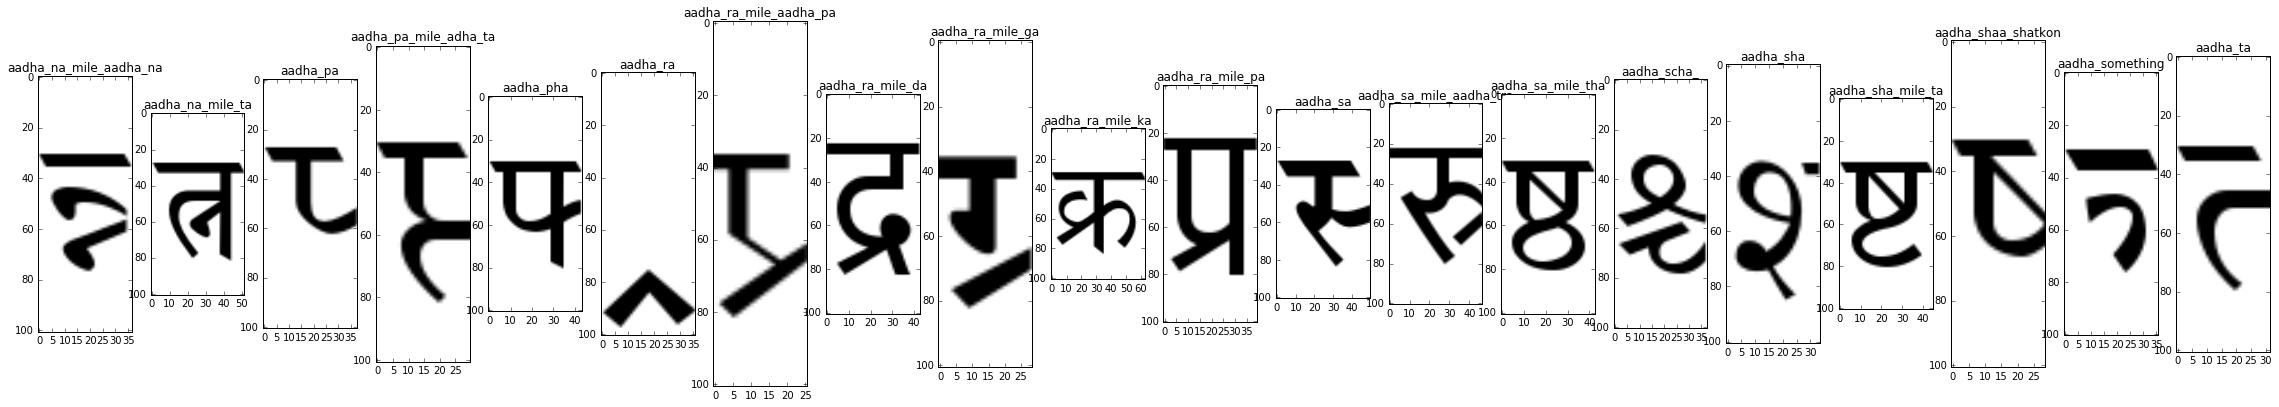


क्त ट्ट क्त् ट्ठ थ् ठ्ठ त्र् व् व्द हृ व् य् N ज़् ड ल्ह ए ण ब भ

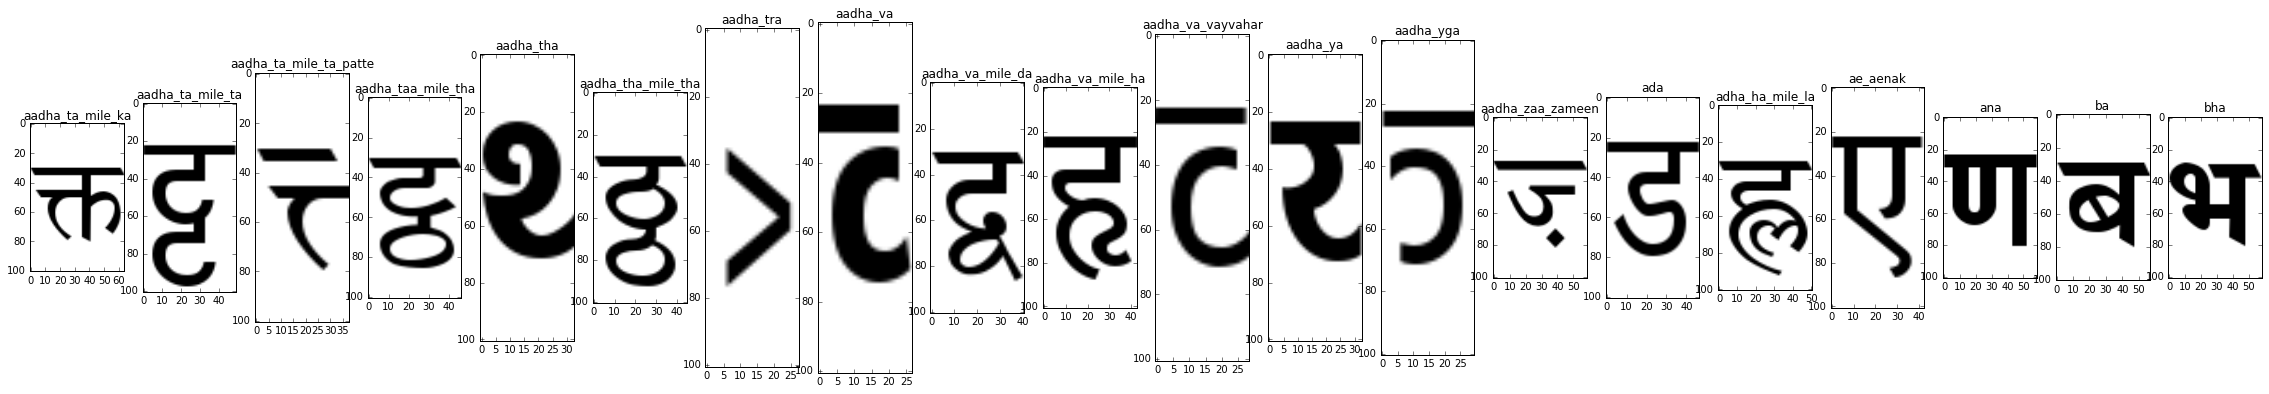


च छ द ढ ध . इ E ! / ग घ ज्ञ ह ऽ । हु हू ज झ

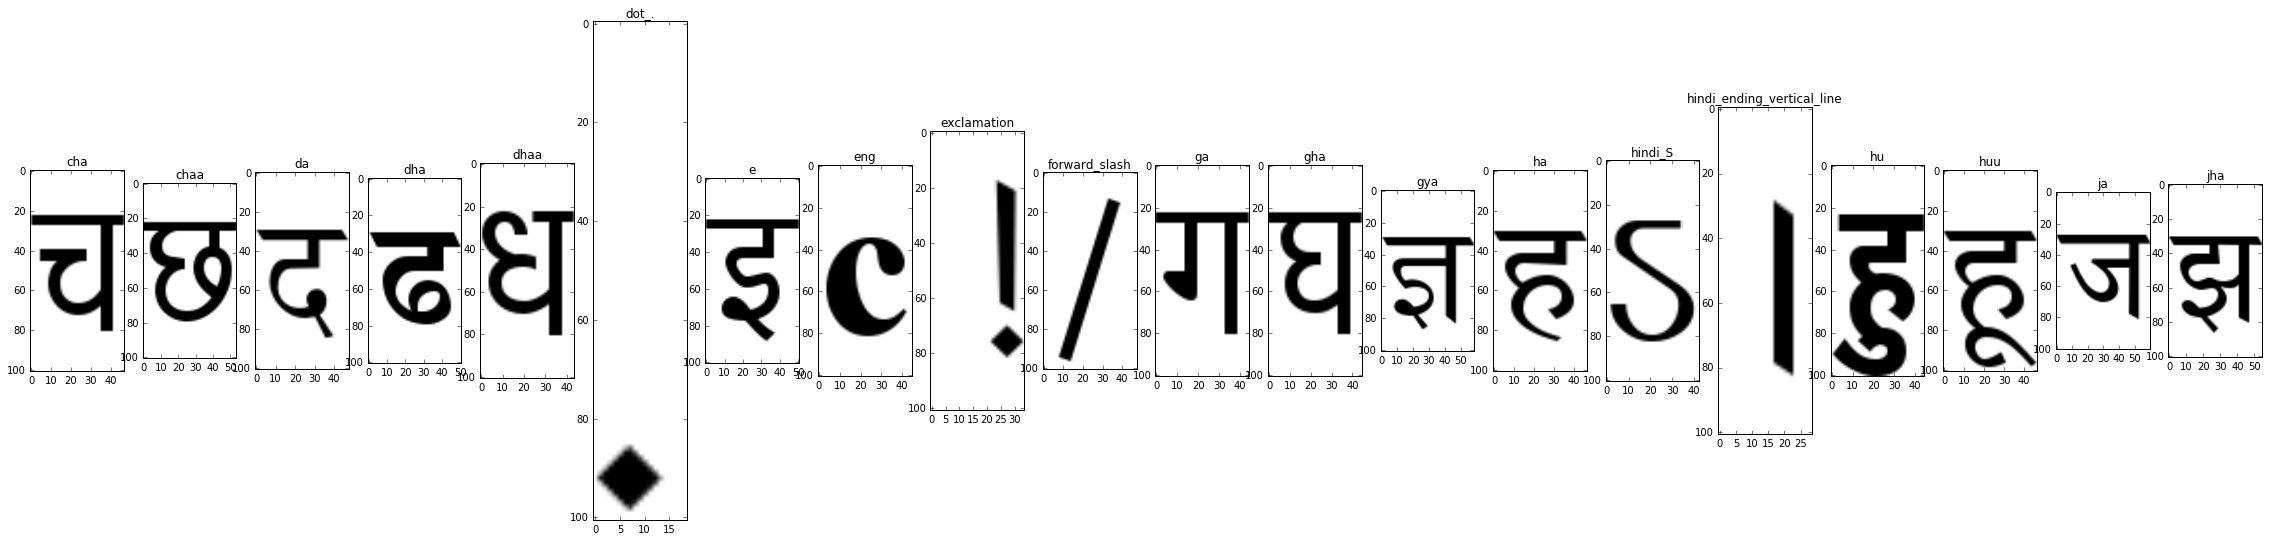


क ख क्ष श्र ल म ा ाै ाे ्र ् ै ैं ँ ॅ ी ीं ू ि िं

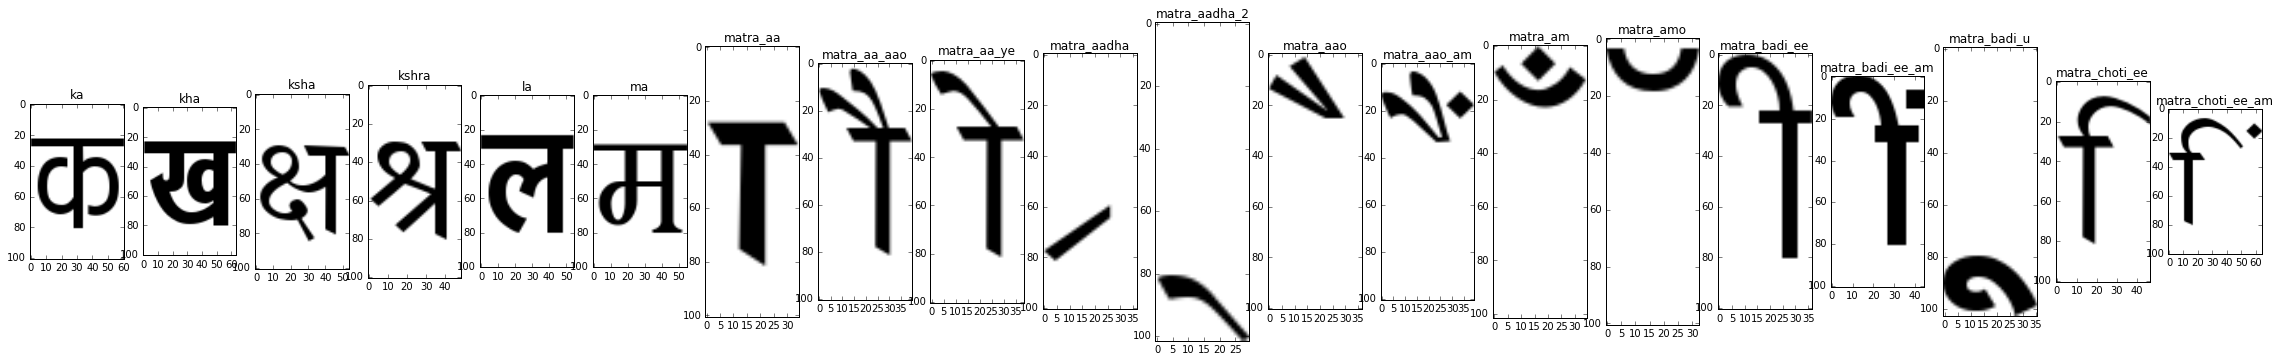


िॕ ु ृ े ॔ ॔ं ं े ें े॔ न प फ र ऋ रू ₹ स ष श

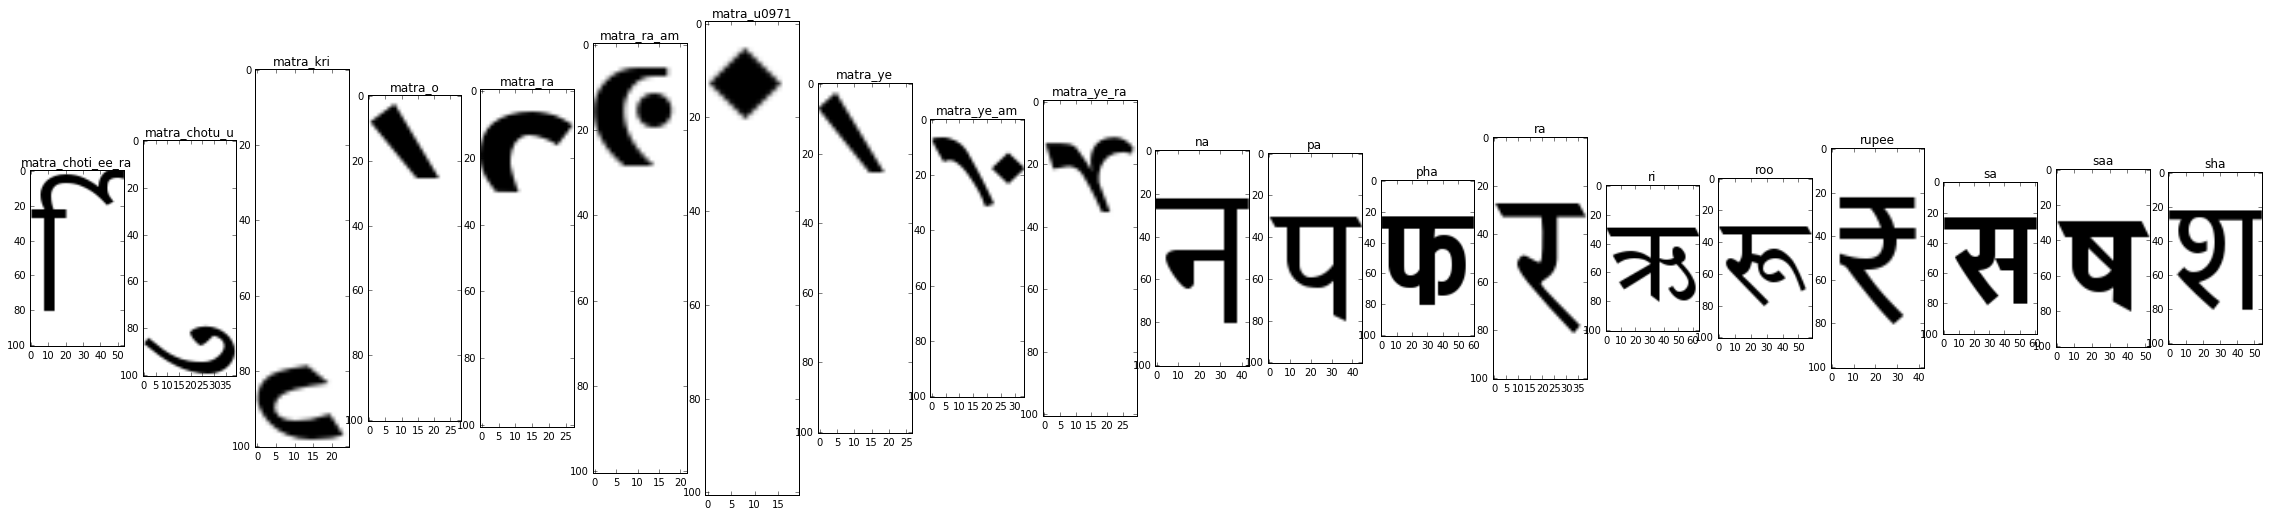


ॸ त ट थ ठ उ ऊ व य

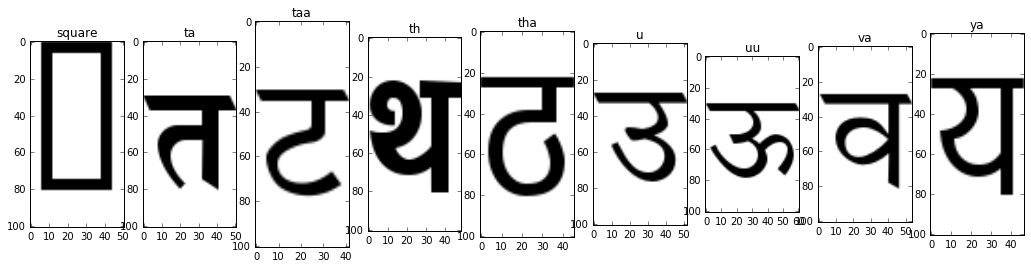

In [14]:

plt.subplots_adjust(wspace = 0.5)
for i in range(0, len(chars), 20):
    fig = plt.figure(figsize=(40,20))
    for j in range(20):
        if (i + j) < len(chars):
            ch = chars[i + j]
            print chars_uni[i+j],
            image = os.listdir(cleaned_dir + ch)[0]
            img = cv2.imread(cleaned_dir + ch + '/' + image)
            #img = cv2.resize(img, (100,64))
            ax = fig.add_subplot(1, 20, j+1)
            ax.set_title(ch)
            ax.imshow(img, cmap='gray')
    plt.show()
    print 

In [13]:
chars_uni = ['#','%','&',"'",'(',')','*','+',',','-','0','1','2','3','4','5','6','7','8','9',
            ':','=','?','@', u'\u0905', u'\u094d', u'\u0921\u094d\u0921', u'\u0923\u094d', u'\u0928\u094d\u0928\u094d', 
             u'\u092c\u094d', u'\u092d\u094d', u'\u091a\u094d', u'\u0915\u094d\u0937\u094d', u'\u091A\u094d\u091A', u'\u091a\u094d\u092f', u'\u0926\u094d\u0926', u'\u0927\u094d', u'\u0927\u094d\u0926',
            u'\u0922\u094d\u0922', u'\u0917\u094d', u'\u0918\u094d', u'\u0918\u094d\u0926', u'\u091c\u094d\u091e', u'\u0939\u094d',  u'\u0939\u094d\u0928',  u'\u0939\u094d\u0935', u'\u0939\u094d\u092f', u'\u091c\u094d', 
             u'\u091c\u094d\u091c\u094d', u'\u091d\u094d', u'\u091c\u094d\u091e\u094d', u'\u0915\u094d', u'\u0915\u094d\u0915', u'\u0916\u094d', u'\u0936\u094d\u0930\u094d', u'\u0933\u094d', u'\u0932\u094d\u0932',
            u'\u092e\u094d', u'\u0939\u094d\u092e', u'\u0928\u094d', u'\u0928\u094d\u0928', u'\u0928\u094d\u0924', u'\u092a\u094d', u'\u092a\u094d\u0924\u094d', u'\u092b\u094d', u'\u094d\u0930', u'\u092a\u094d\u0930\u094d',
            u'\u0926\u094d\u0930', u'\u0917\u094d\u0930\u094d', u'\u0915\u094d\u0930', u'\u092a\u094d\u0930', u'\u0938\u094d', u'\u0938\u094d\u0924\u094d\u0930', u'\u0937\u094d\u0920', u'\u0936\u094d\u0930\u094d\u091a\u094d',
            u'\u0936\u094d', u'\u0937\u094d\u091f', u'\u0937\u094d', 'N', u'\u0924\u094d', u'\u0915\u094d\u0924', u'\u091f\u094d\u091f', u'\u0915\u094d\u0924\u094d', u'\u091f\u094d\u0920', 
             u'\u0925\u094d', u'\u0920\u094d\u0920', u'\u0924\u094d\u0930\u094d', u'\u0935\u094d',
            u'\u0935\u094d\u0926', u'\u0939\u0943', u'\u0935\u094d', u'\u092f\u094d', 'N', u'\u095b\u094d',  u'\u0921', u'\u0932\u094d\u0939', u'\u090f', u'\u0923', u'\u092c', u'\u092d', u'\u091a', u'\u091b',
            u'\u0926', u'\u0922', u'\u0927', '.', u'\u0907', 'E', '!', '/', u'\u0917', u'\u0918', u'\u091c\u094d\u091e', u'\u0939', u'\u093d', u'\u0964', u'\u0939\u0941', u'\u0939\u0942', u'\u091c', u'\u091d', u'\u0915', 
             u'\u0916', u'\u0915\u094d\u0937', u'\u0936\u094d\u0930', u'\u0932', u'\u092e', u'\u093e',  u'\u093e\u0948',  u'\u093e\u0947', u'\u094d\u0930', u'\u094d', u'\u0948', u'\u0948\u0902', u'\u0901', u'\u0945', u'\u0940', u'\u0940\u0902',
            u'\u0942', u'\u093f', u'\u093f\u0902', u'\u093f\u0955', u'\u0941', u'\u0943', u'\u0947', u'\u0954', u'\u0954\u0902', u'\u0902', u'\u0947', u'\u0947\u0902', u'\u0947\u0954', u'\u0928', u'\u092a', u'\u092b',
            u'\u0930', u'\u090b', u'\u0930\u0942',  u'\u20b9', u'\u0938', u'\u0937', u'\u0936', u'\u0978', u'\u0924', u'\u091f', u'\u0925', u'\u0920', u'\u0909', u'\u090a', u'\u0935', u'\u092f']

In [85]:
redundant = {}

for i in range(len(chars)):
    if chars_uni[i] not in redundant:
        redundant[chars_uni[i]] = [chars[i]]
    else:
        redundant[chars_uni[i]] += [chars[i]]

In [86]:
for c in chars_uni:
    print redundant[c], [c]

[u'\u0902'] ['#']
[u'\u0906'] ['%']
[u'\u090a'] ['&']
[u'\u090e'] ["'"]
[u'\u0912'] ['(']
[u'\u0916'] [')']
[u'\u091a'] ['*']
[u'\u091e'] ['+']
[u'\u0922'] [',']
[u'\u0926'] ['-']
[u'\u092a'] ['0']
[u'\u092e'] ['1']
[u'\u0932'] ['2']
[u'\u0936'] ['3']
[u'\u093e'] ['4']
[u'\u0942'] ['5']
[u'\u0946'] ['6']
[u'\u094a'] ['7']
[u'\u0952'] ['8']
[u'\u095e'] ['9']
[u'\u0966'] [':']
[u'\u096a'] ['=']
[u'\u096e'] ['?']
[u'\u0901'] ['@']
[u'\u0905'] [u'\u0905']
[u'\u0909'] [u'\u094d']
[u'\u090d'] [u'\u0921\u094d\u0921']
[u'\u0911'] [u'\u0923\u094d']
[u'\u0915'] [u'\u0928\u094d\u0928\u094d']
[u'\u0919'] [u'\u092c\u094d']
[u'\u091d'] [u'\u092d\u094d']
[u'\u0921'] [u'\u091a\u094d']
[u'\u0925'] [u'\u0915\u094d\u0937\u094d']
[u'\u092d'] [u'\u091a\u094d\u091a']
[u'\u0935'] [u'\u091a\u094d\u092f']
[u'\u0939'] [u'\u0926\u094d\u0926']
[u'\u093d'] [u'\u0927\u094d']
[u'\u0941'] [u'\u0927\u094d\u0926']
[u'\u0945'] [u'\u0922\u094d\u0922']
[u'\u0949'] [u'\u0917\u094d']
[u'\u094d'] [u'\u0918\u094d']
[u'\u0951'

KeyError: u'\u0923'

In [87]:
len(chars)

97

In [88]:
len(chars_uni)

169

In [93]:
font_to_chars_uni_map = {}

In [94]:
for i in range(len(chars)):
    fonts = os.listdir('../dataset/cleaned/' + chars[i])
    
    for font in fonts:
        font_to_chars_uni_map[font[:-4]] = chars_uni[i]

In [95]:
font_to_chars_uni_map.keys()[0:10]

['31chh-pg10-0.dump650_NTQQYD+NDCompact-Bold_0xa1',
 '31chh-pg6-0.dump63_ChanakyaNew_0xe1',
 '01chh-pg4-0.dump560_ChanakyaNew_0xbb',
 '01chh-pg4-0.dump560_ChanakyaNew_0xbf',
 '02chh-pg6-0.dump480_ChanakyaNew_0x4d',
 '31chh-pg6-0.dump36_ChanakyaNew_0xaa',
 '31chh-pg6-0.dump36_ChanakyaNew_0xac',
 '31chh-pg6-0.dump36_ChanakyaNew_0xab',
 '31ash-pg8-0.dump223_EGHBMV+ndtext1-Bold_0x58',
 '01chh-pg4-0.dump550_ChanakyaNew_0x2dd']

In [96]:
fout = open('../dataset/nai_duniya_fonts_to_chars_uni.pkl','wb')
pickle.dump(font_to_chars_uni_map, fout)
fout.close()

In [7]:
fin = open('../dataset/nai_duniya_fonts_to_chars_uni.pkl', 'rb')
font_to_chars_uni_map = pickle.load(fin)
fin.close()

In [15]:
from pdf2image import convert_from_path
import pdfplumber
import cv2
import numpy as np 
from math import ceil, floor
from os import listdir
import json
from random import shuffle


In [9]:

PDF_DIR = '../dataset/nai_duniya/'
pdfs = listdir(PDF_DIR)
pdfs.sort()

In [10]:
def parse_pdf(pdf_path):
    done = {}
    img_to_charunis = {}
    word_no = 1
    
    image = convert_from_path(PDF_DIR + pdf_path, fmt='jpg')
    image = image.pop()
    img = np.asarray(image)

    pdf = pdfplumber.open(PDF_DIR + pdf_path)
    first_page = pdf.pages[0]
    words = first_page.extract_words()
    pdf_height = float(first_page.height)
    pdf_width = float(first_page.width)

    img_height = img.shape[0]
    img_width = img.shape[1]

    height_scale = img_height/ (pdf_height * 1.0)  
    width_scale = img_width/ (pdf_width * 1.0)

    for word in words:
        xmin = int(floor(float(word['x0']) * width_scale))
        xmax = int(ceil(float(word['x1']) * width_scale))
        ymin = int(floor(float(word['top']) * height_scale))
        ymax = int(ceil(float(word['bottom']) * height_scale))

        patch = img[ymin:ymax, xmin:xmax, :]
        cropped = first_page.crop((word['x0'], word['top'], word['x1'], word['bottom']))
        
        width = patch.shape[1]
        chars = len(word['text'])
        word_text = word['text']
        
        
        if word_text + '_' + str(patch.shape[0]) + '_' + str(patch.shape[1]) not in done  and patch.shape[0] > 0 and patch.shape[1] > 0:
            done[word_text + '_' + str(patch.shape[0]) + '_' + str(patch.shape[1])] = 1
            cv2.imwrite('../dataset/nai_duniya_words/' + pdf_path + '_' + str(word_no).zfill(10) + '.png', patch)                    
            
            font_name = cropped.chars[0]['fontname']
            char_font_hex = []
            for c in word_text:
                hx = hex(ord(c))
                char_font_hex.append(pdf_path[:-4] + '_' + font_name + '_' + hx)

            img_to_charunis[str(word_no).zfill(10)] = char_font_hex
            word_no += 1
    
    fout = open('../dataset/nai_duniya_maps/' + pdf_path + '.pkl', 'wb')
    pickle.dump(img_to_charunis, fout)
    fout.close()

In [11]:
import multiprocessing
import pickle

In [ ]:
pool = multiprocessing.Pool(processes=44)
pool.map(parse_pdf, pdfs)
pool.close()
pool.join()

In [99]:
pkls = os.listdir('../dataset/nai_duniya_maps/')
img_to_charunis = {}
for pkl in pkls:
    fin = open('../dataset/nai_duniya_maps/' + pkl, 'rb')
    itc = pickle.load(fin)
    fin.close()
    
    for k in itc.keys():
        img_to_charunis[pkl[:-4] + '_' + k + '.png'] = itc[k] 


In [100]:
#fout = open('../dataset/nai_duniya_imgs_to_charunis.pkl','wb')
#pickle.dump(img_to_charunis, fout)
#fout.close()

In [12]:
fin = open('../dataset/nai_duniya_imgs_to_charunis.pkl', 'rb')
img_to_charunis = pickle.load(fin)
fin.close()

In [13]:
len(img_to_charunis.keys())

89666

In [14]:
count = 0
for ic in img_to_charunis.keys():
    if len(img_to_charunis[ic]) > 0:
        count += 1

In [15]:
count

89666

In [16]:
img_to_charunis['02chh-pg13-0.pdf_0000002247.png']
font_to_chars_uni_map.keys()[0]

'31chh-pg10-0.dump650_NTQQYD+NDCompact-Bold_0xa1'

In [17]:
k = "31chh-pg10-0.dump650_NDCompact-Bold_0xa1"#font_to_chars_uni_map.keys()[0]
print k
pdf_name = k.split('.')[0] + '_' + k.split('.')[-1].split('_')[1].split('+')[-1] + '_' + k.split('.')[-1].split('_')[-1]
print pdf_name

31chh-pg10-0.dump650_NDCompact-Bold_0xa1
31chh-pg10-0_NDCompact-Bold_0xa1


In [18]:
img_to_word = {}
removed_prefix = {}
not_found = []
for k in font_to_chars_uni_map.keys():
    pdf_name = k.split('.')[0] + '_' + k.split('.')[-1].split('_')[1].split('+')[-1] + '_' + k.split('.')[-1].split('_')[-1]
    if pdf_name not in removed_prefix:
        removed_prefix[pdf_name] = font_to_chars_uni_map[k]
        
for img_k in img_to_charunis.keys():
    word = ''
    for font_hex in img_to_charunis[img_k]:
        if '+' in font_hex:
            pdf_name = font_hex.split('+')[0].split('_')[0] + '_' + font_hex.split('+')[1]
        else:
            pdf_name = font_hex
        if pdf_name.split('+')[-1] in removed_prefix:
            word += removed_prefix[pdf_name]
        else:
            not_found.append([pdf_name, img_k])
    img_to_word[img_k] = word

In [19]:
len(not_found)

58811

In [20]:
len(not_found)
uniques = {}
for nf in not_found:
    if nf[0].split('_')[1] + '_' + nf[0].split('_')[2] not in uniques:
        uniques[nf[0].split('_')[1] + '_' + nf[0].split('_')[2]] = [nf]
    else:
        uniques[nf[0].split('_')[1] + '_' + nf[0].split('_')[2]] += [nf]

In [21]:
iname = uniques[uniques.keys()[0]][0]
print iname

['02ash-pg17-0_ndtext1_0xa8', '02ash-pg17-0.pdf_0000001802.png']


In [22]:
len(uniques.keys())

1200

EEEEEEEEEE 	माैके 	परेखा 	सभी 	रजत 	था 	वष॔ 	मूय 	नजिकटपमकररीनाायजर 	पाटी॔ 	

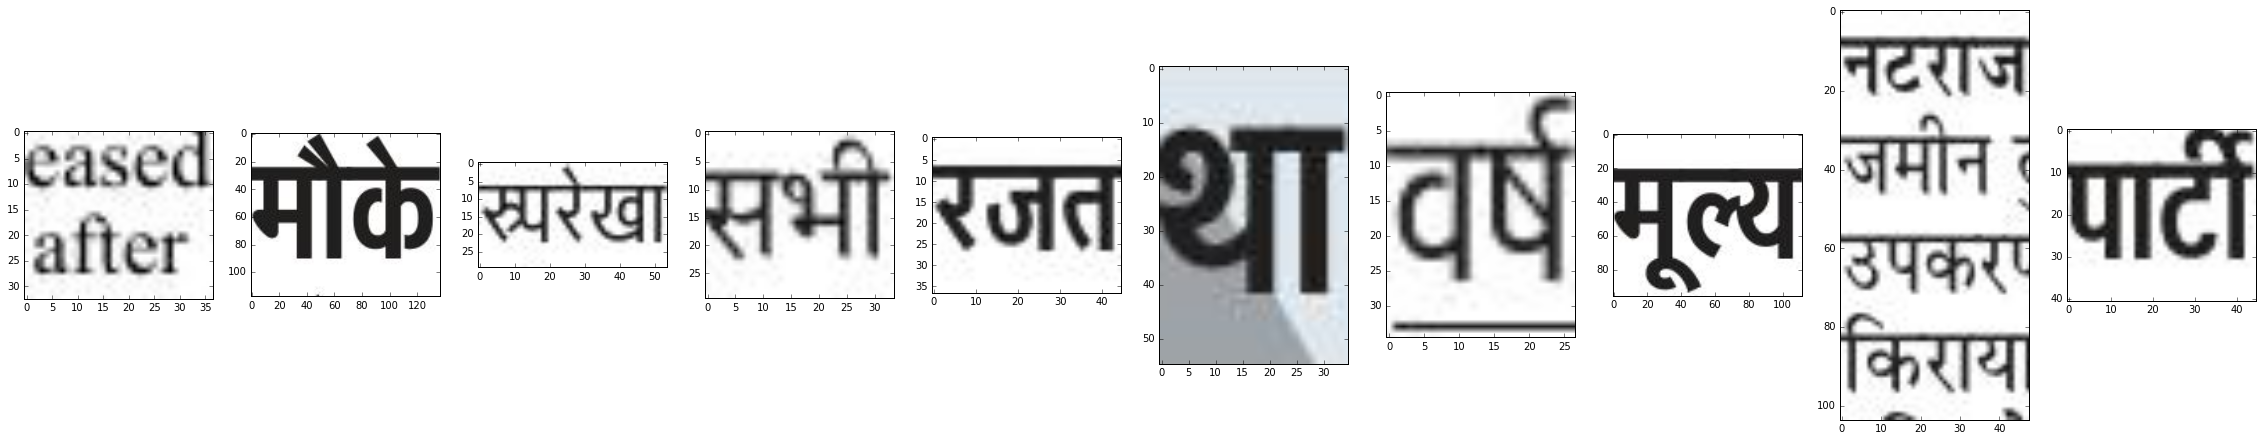

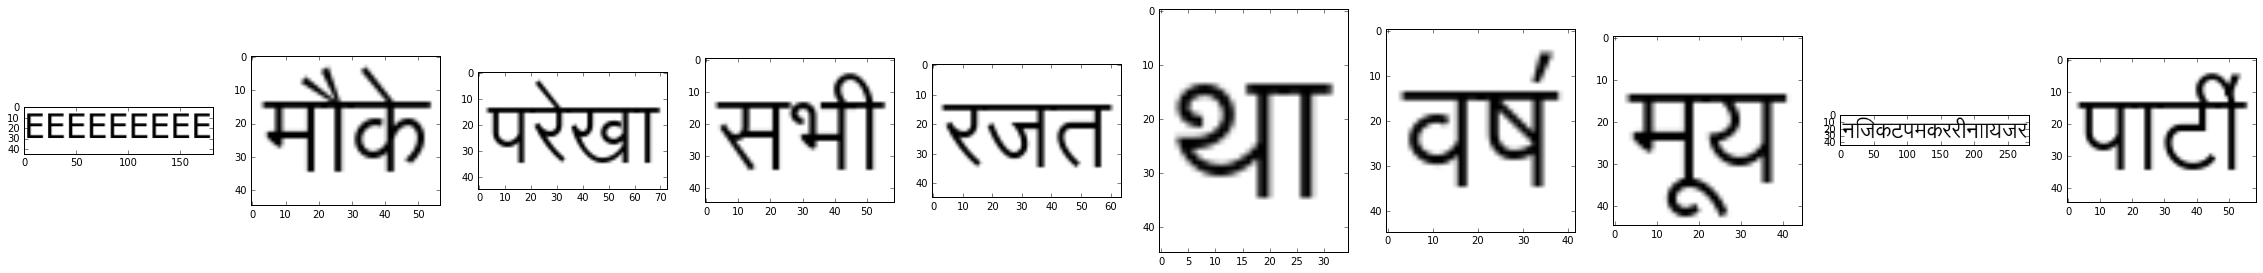

कर 	रव 	अाराेिपत 	यादा 	जानकारी 	525 	केक्टर 	वथ 	तरह 	नेहाा 	

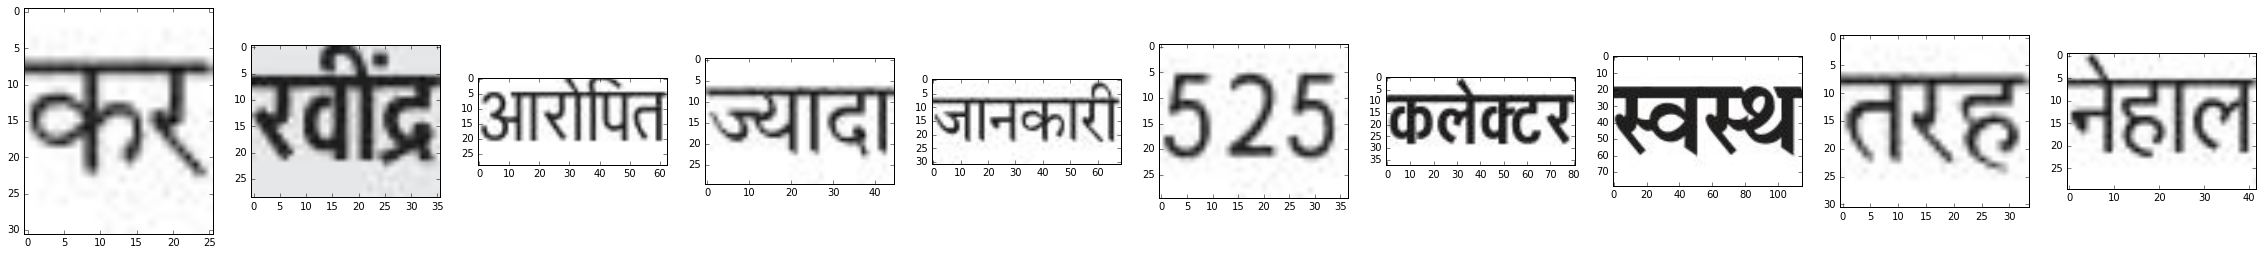

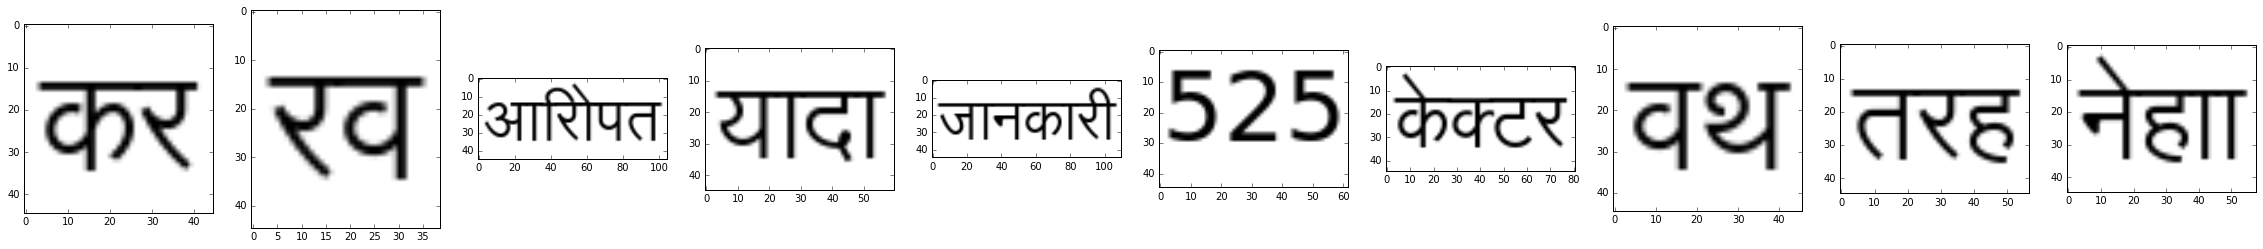

कानून 	सकी 	दाे 	कराइ॔। 	जादूटाना,मुकरण्ाी,पित 	सारंगपुर 	नरें 	मंिदर 	िकया। 	टेिडयम 	

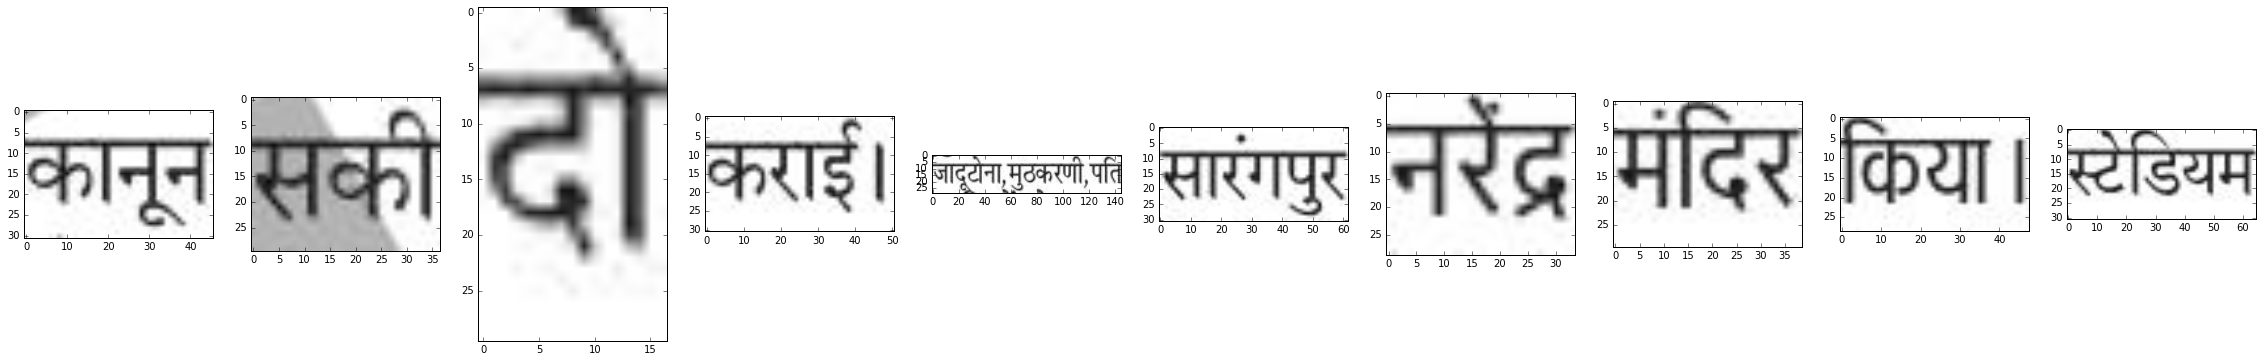

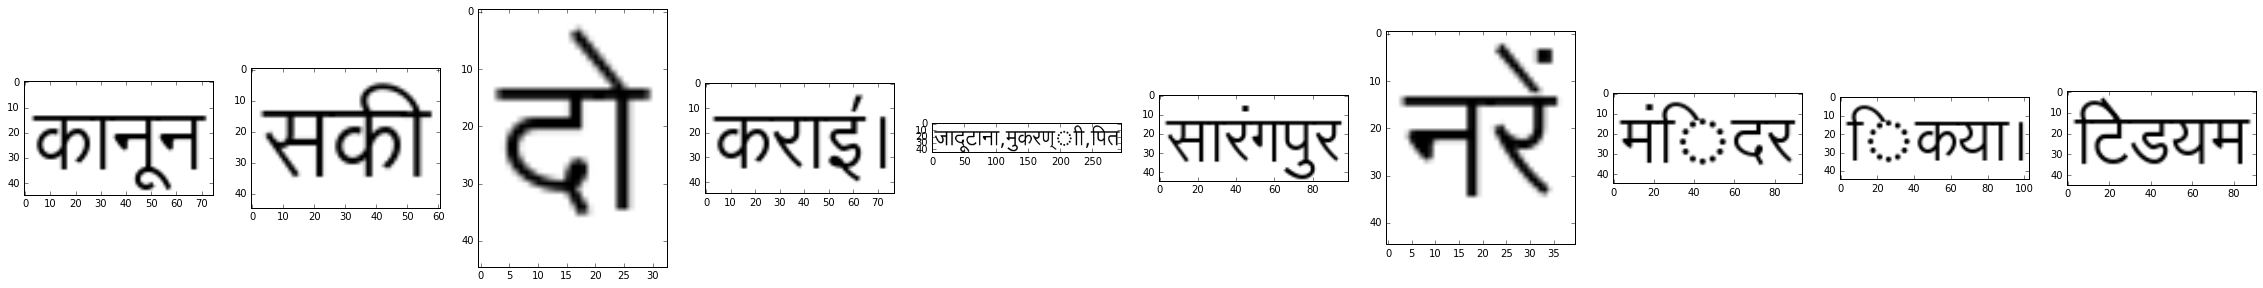

ग्राहक 	3598 	वाट्सअप 	समूह 	कर 	तीसरी 	कबाय॔ 	अिवनाश 	मिहा, 	में 	

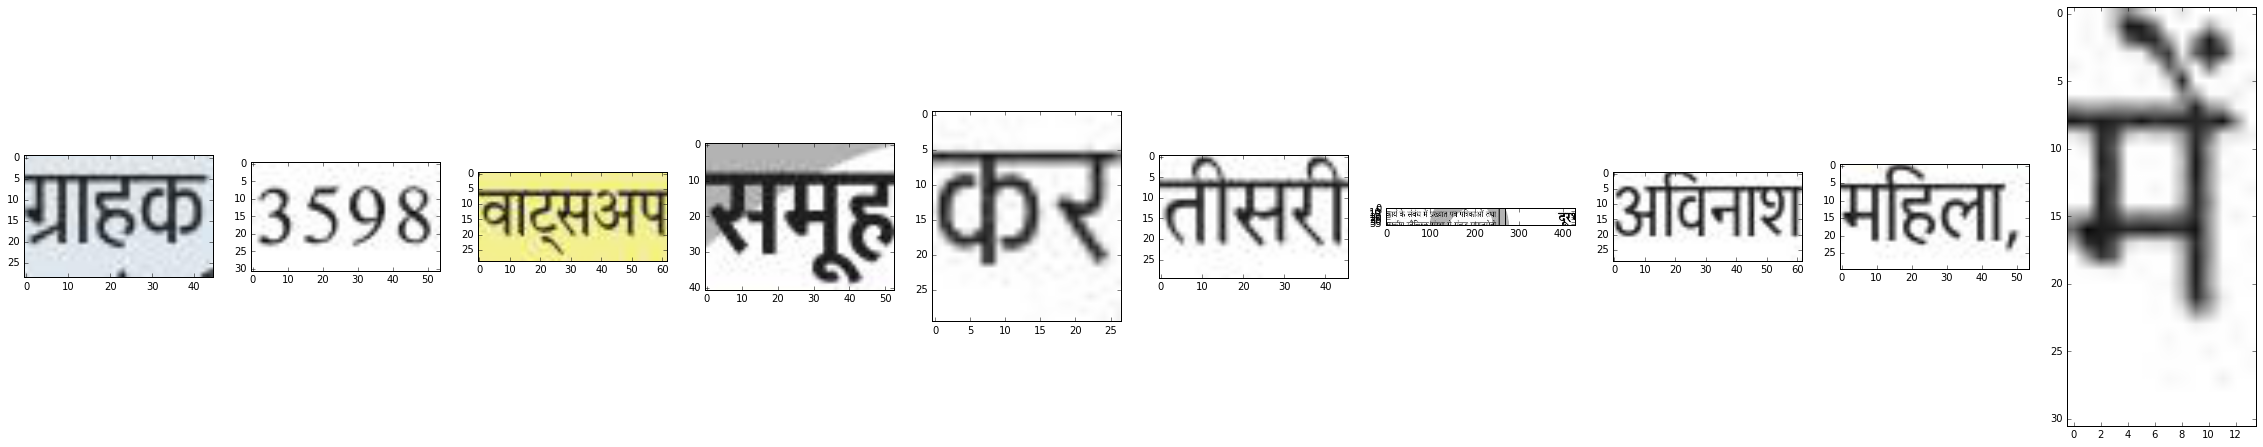

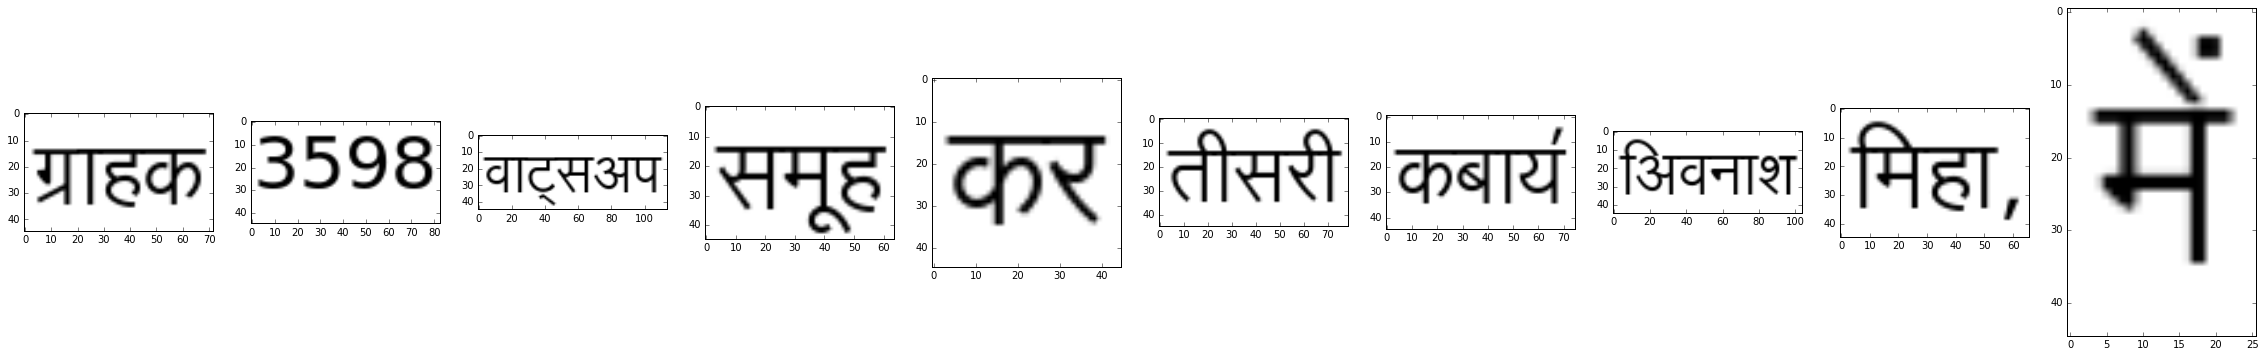

यहां 	सरकार 	.डाइ॔ 	एिशया 	माना 	EEEE 	युवाअा 	अाैर 	ग्रहण 	 	

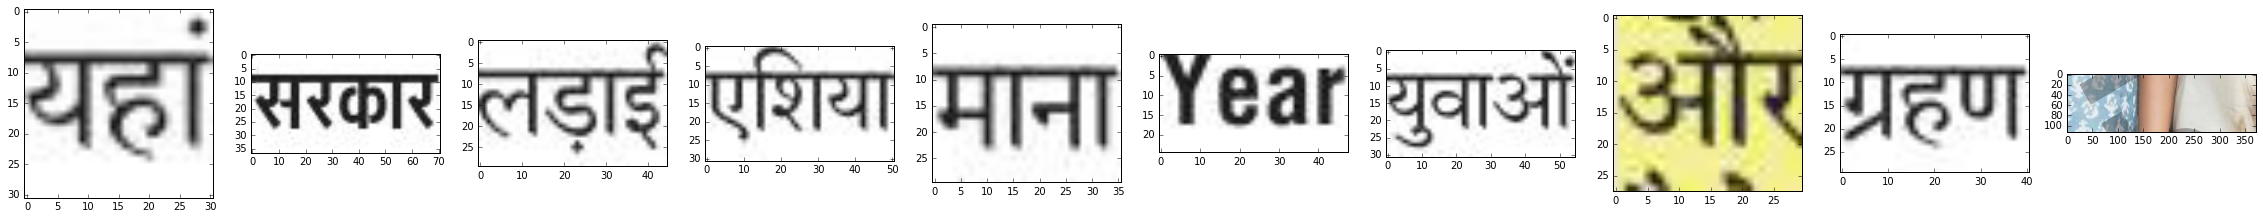

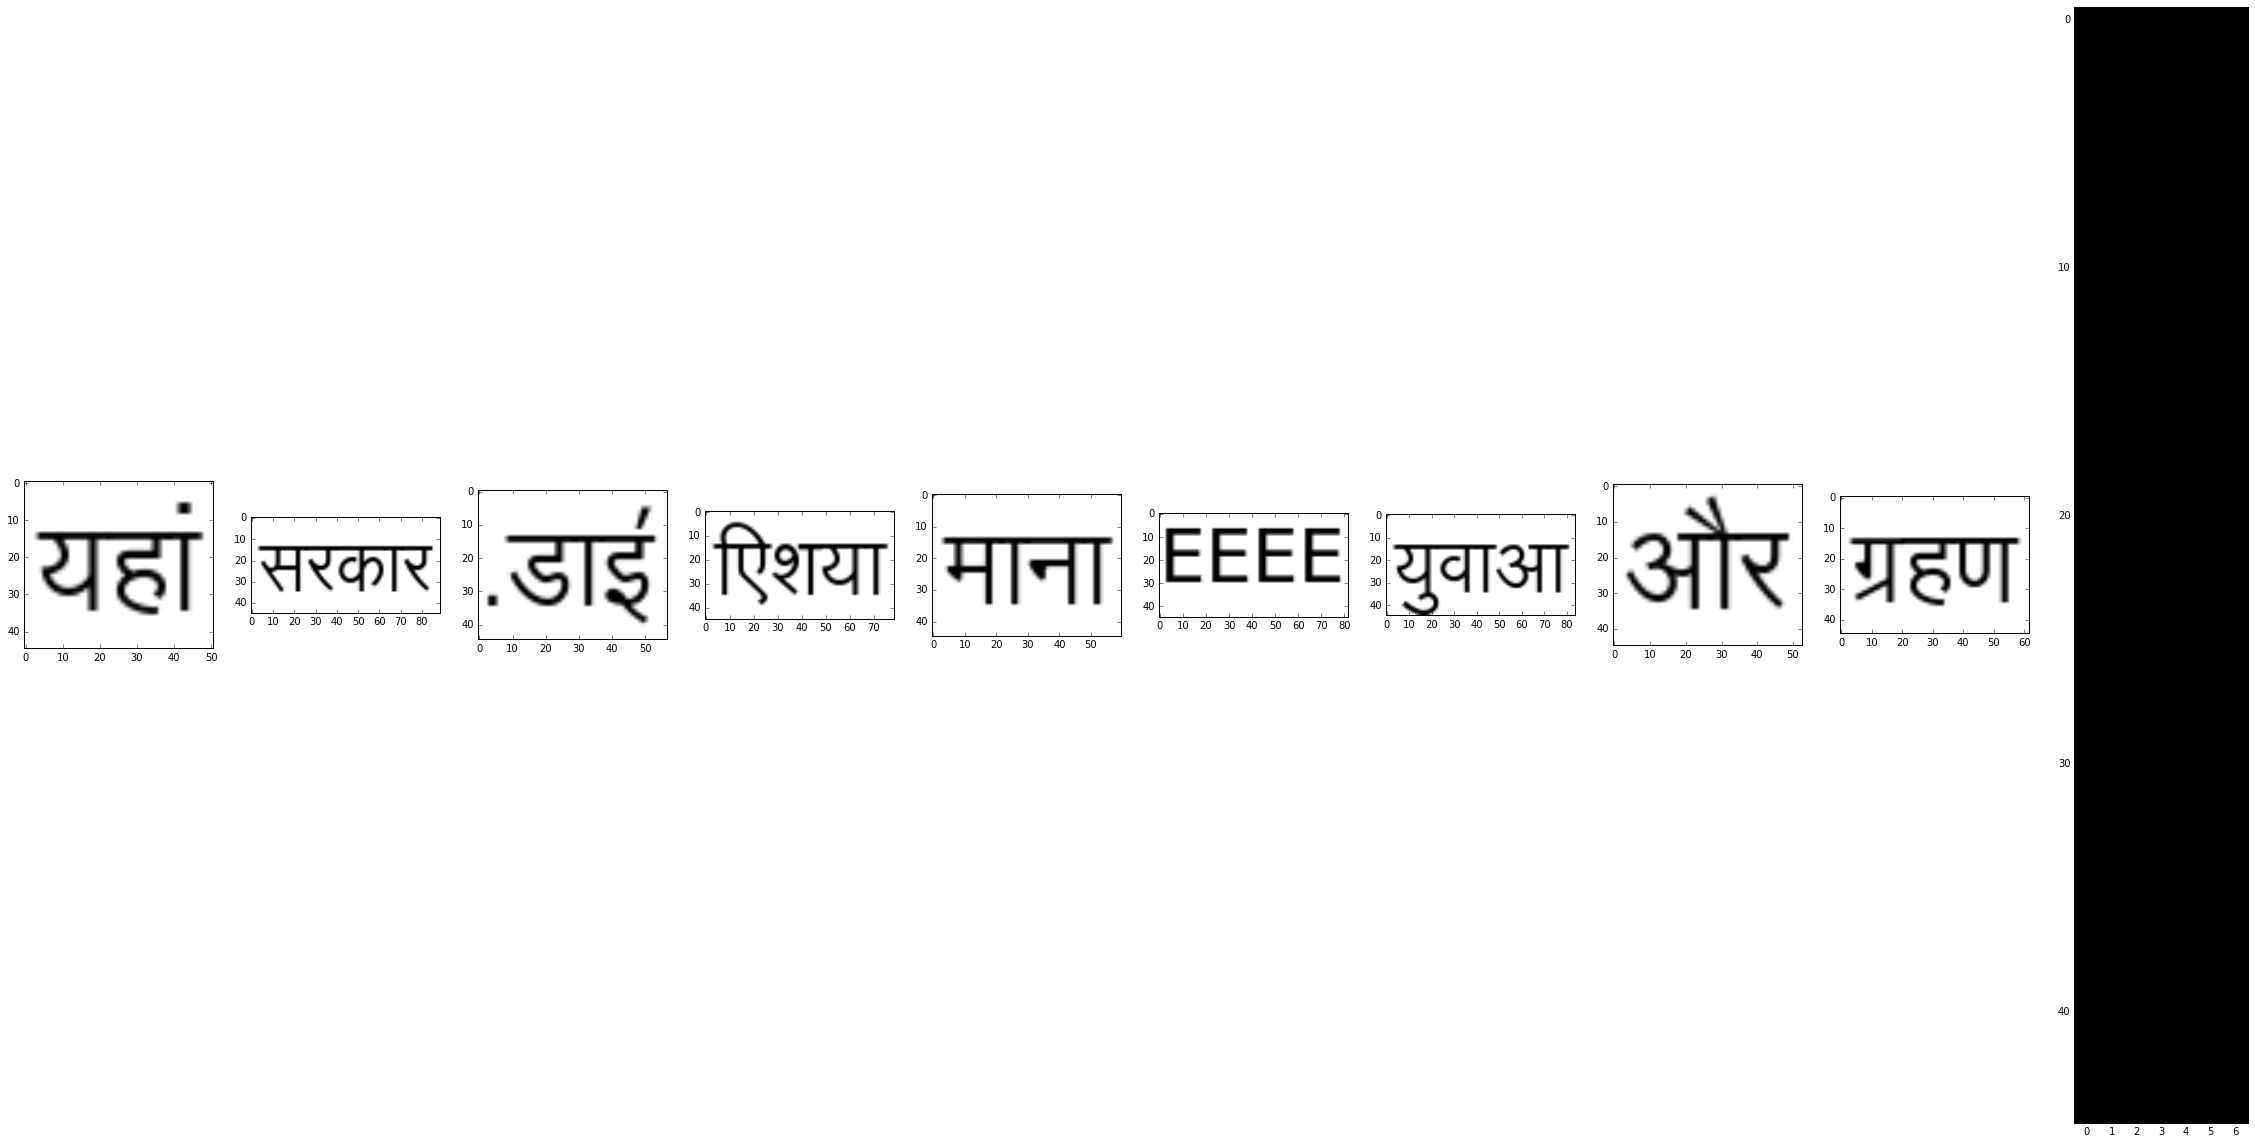

भाेपा) 	माक॔श्ाीट, 	उक्त 	काय॔ 	िदन 	गए। 	नइ॔ 	रा 	के 	जगह 	

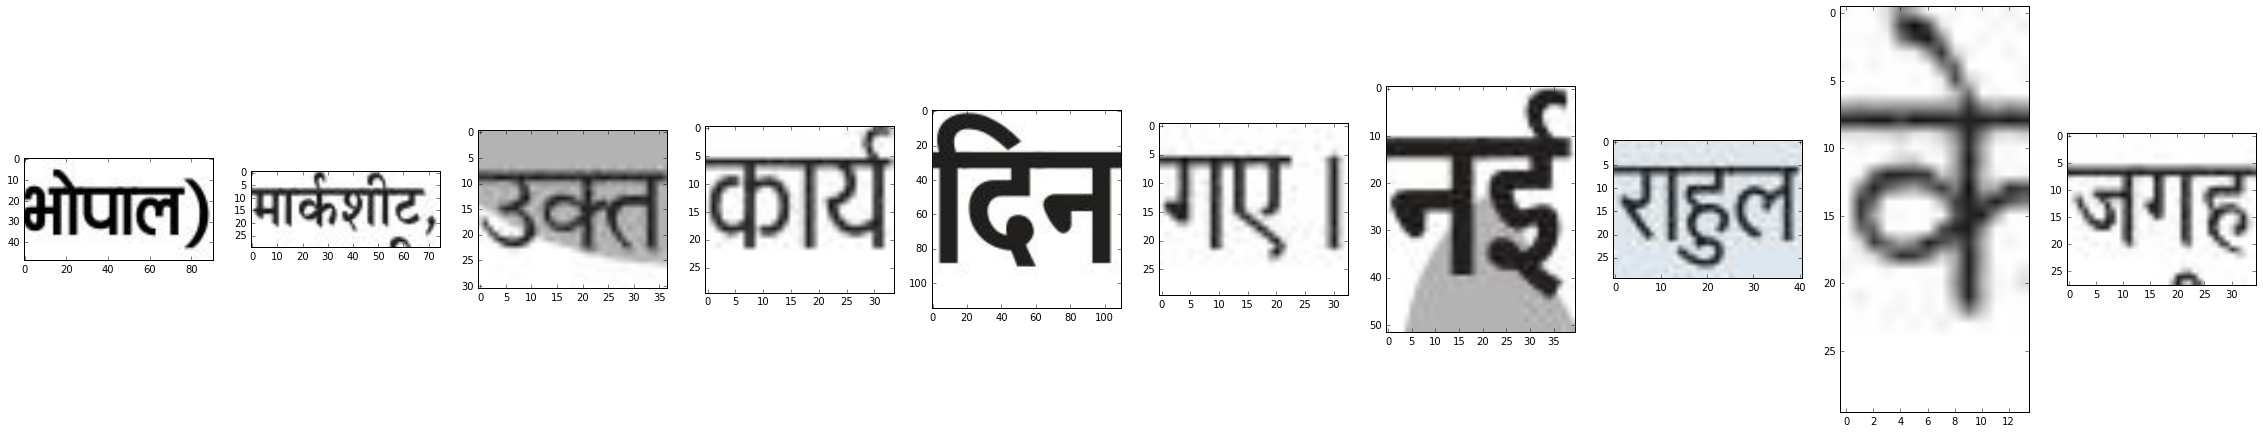

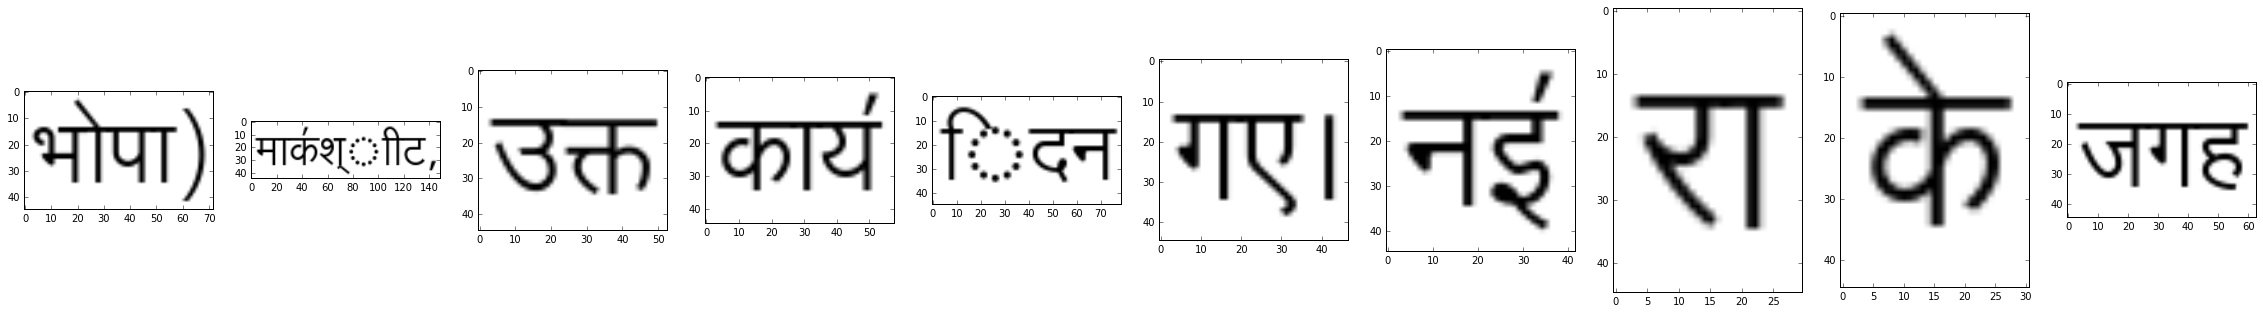

जी-13761/18 	िफर 	याेता 	िकये 	बताया 	देर 	E, 	अंतरा्॔रीय 	रायमंाी 	पीि.डता 	

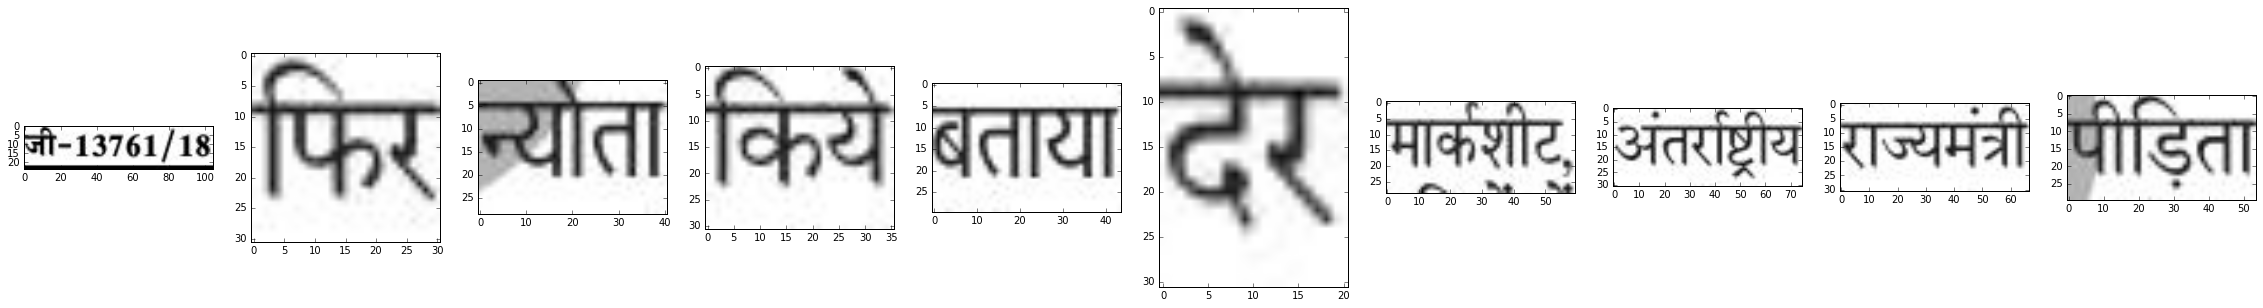

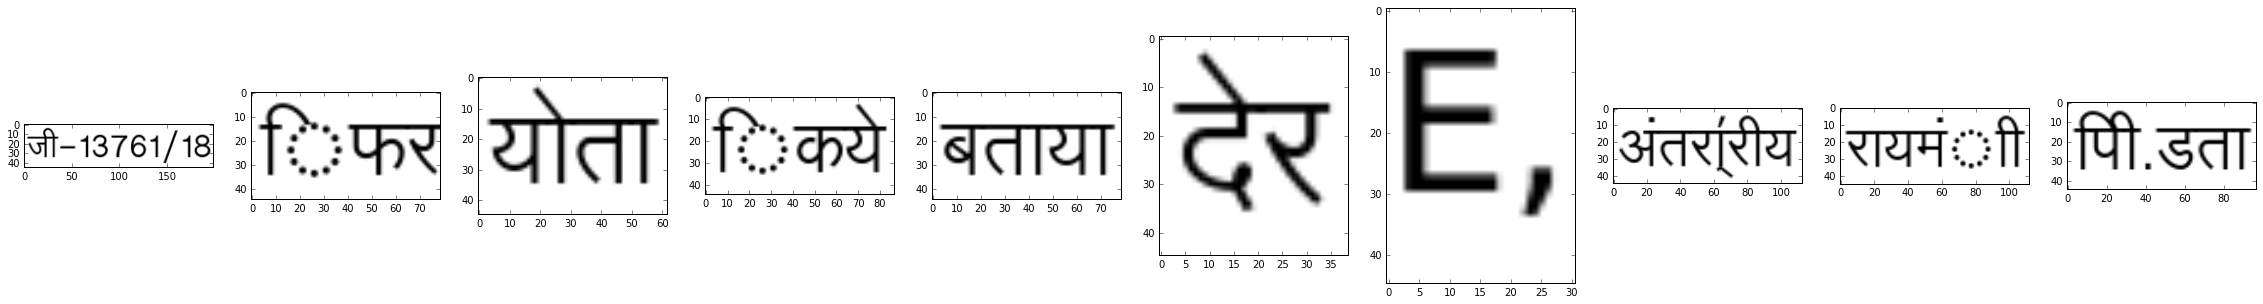

जैन 	सरकार 	गहरे 	अाॅटे्रियाइ॔ 	माह 	ह 	अामंिात 	कक॔ 	रही 	थे। 	

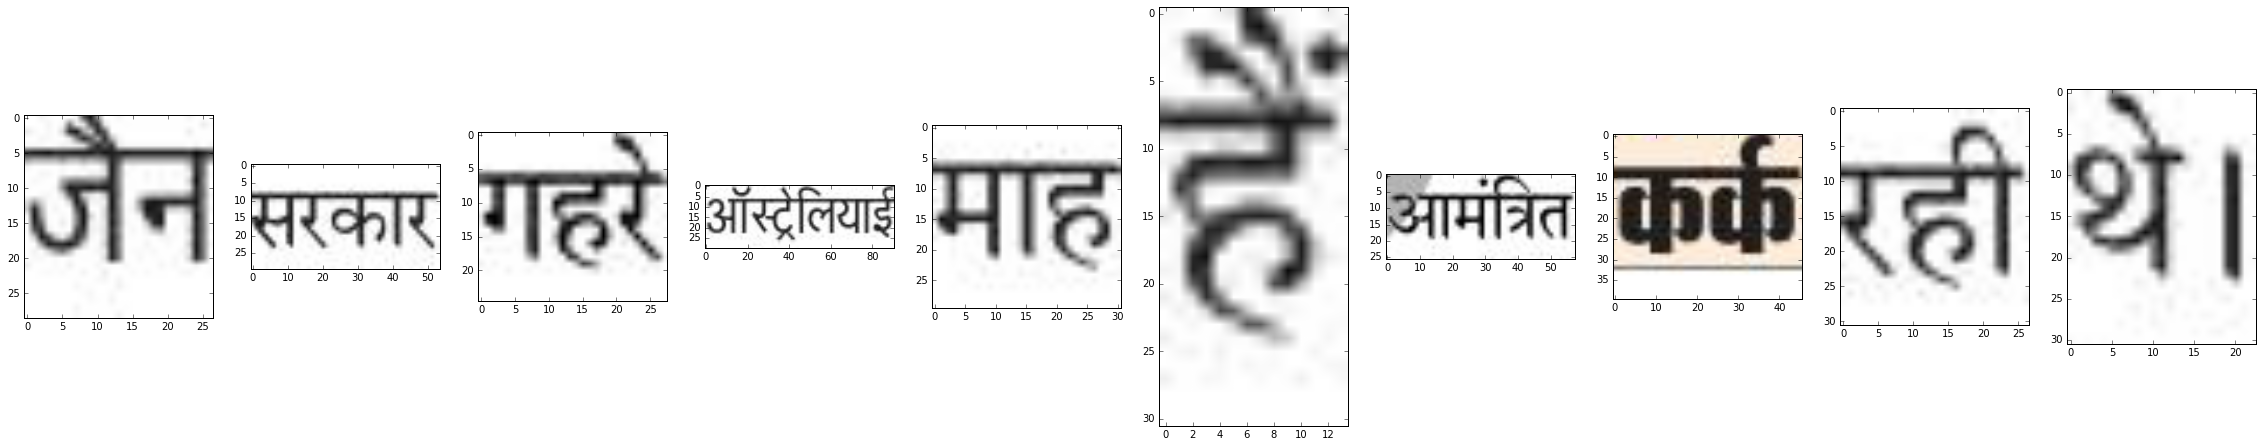

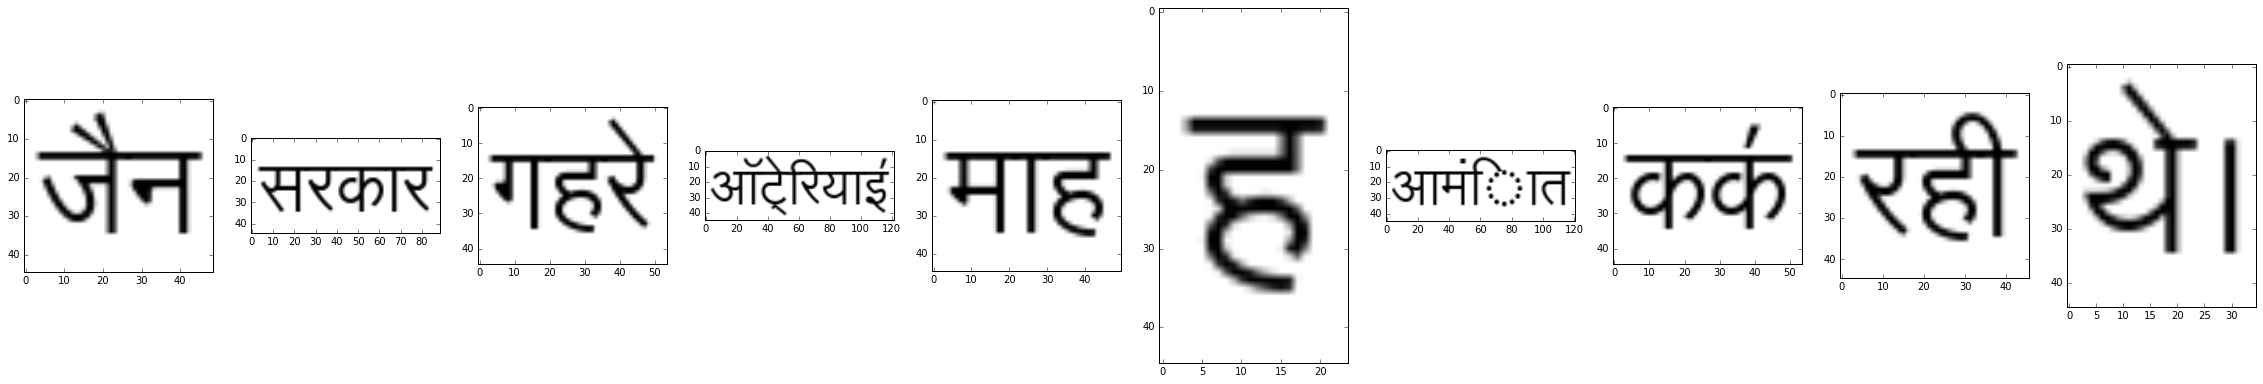

िकसी 	ताप 	सूरत 	दु॔भ 	02 	EEEEEEEEEEE 	टडर 	4430 	हटना 	फीट 	

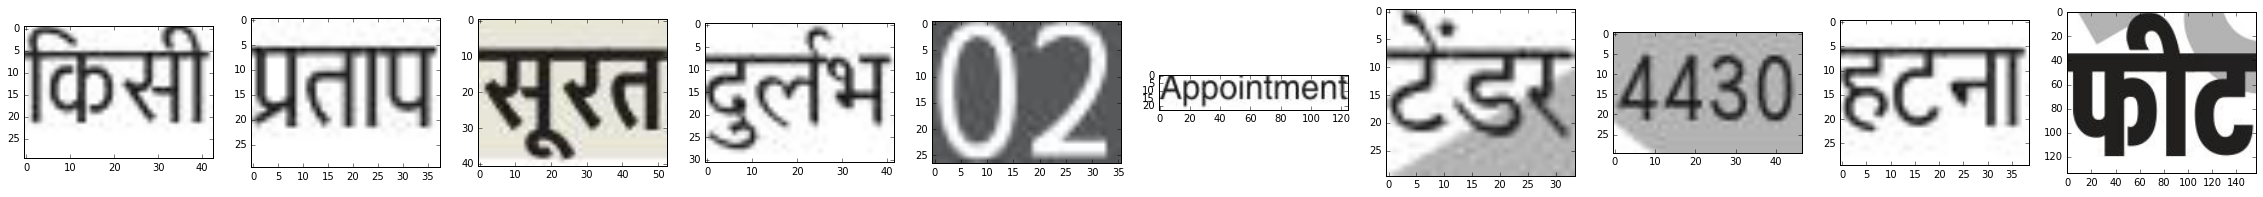

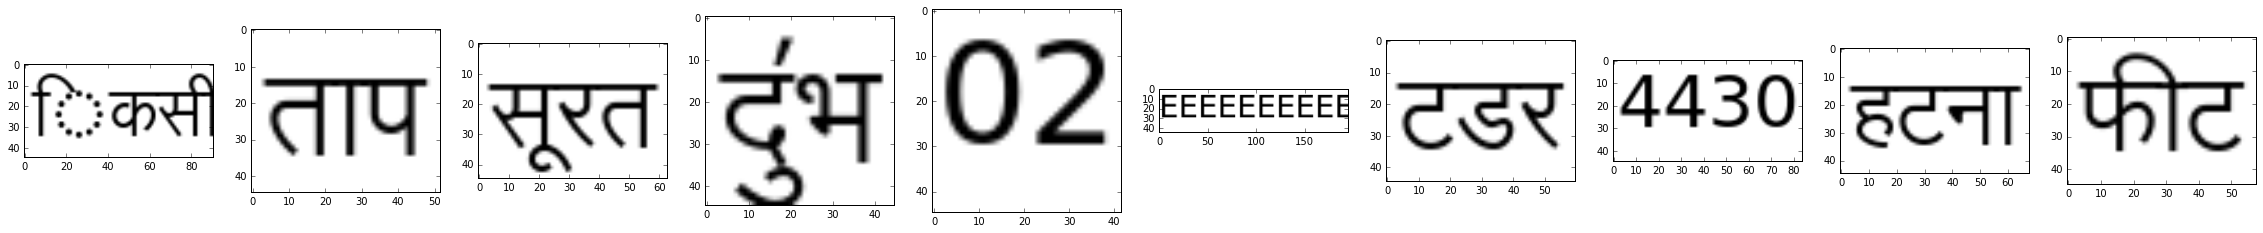

माक॔ेवाी 	सुबह 	11 	भेजने 	दाक 	की 	बीच 	अब्दुल 	अिभयान 	सीखा 	

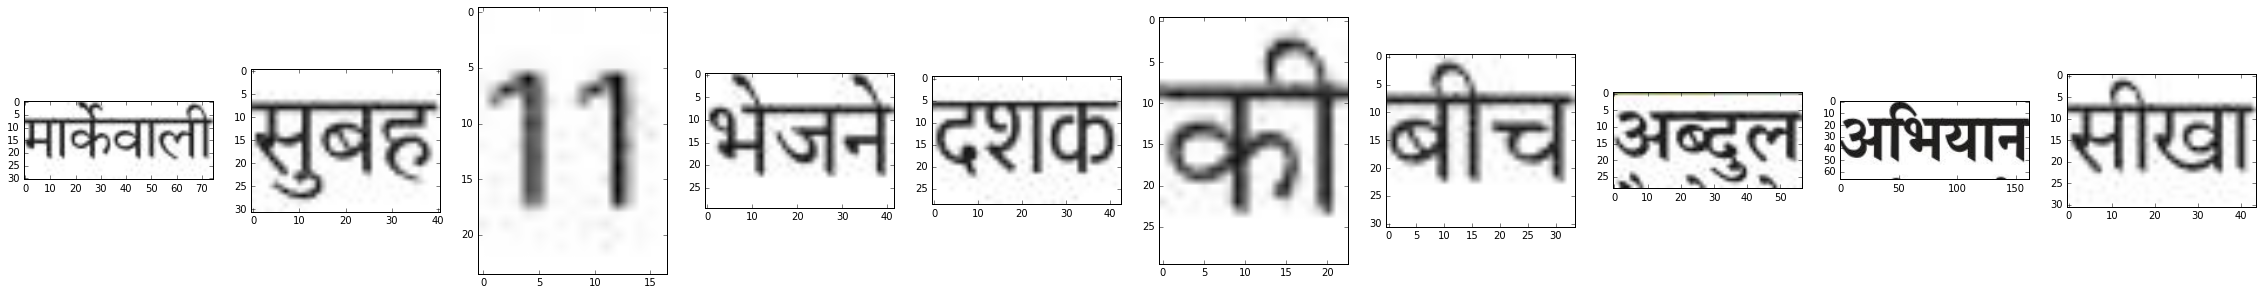

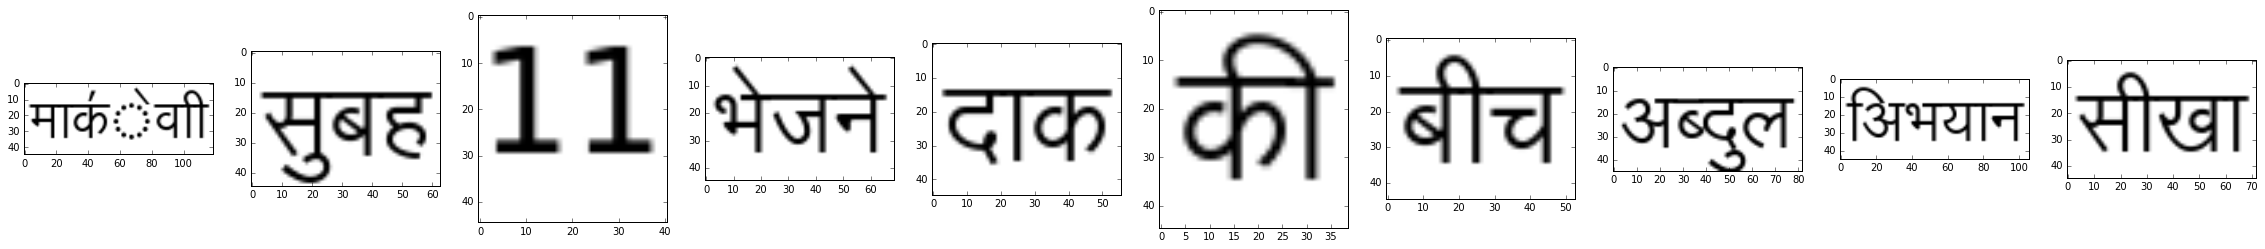

In [143]:
sample = img_to_word.keys()[:100]
plt.subplots_adjust(wspace = 0.5)
for i in range(0, len(sample), 10):
    fig = plt.figure(figsize=(40,20))
    for j in range(0, 10):
        if (i + j) < len(sample):
            print img_to_word[sample[i+j]], '\t',
            img = cv2.imread('../dataset/nai_duniya_words/' + sample[i+j])
            ax = fig.add_subplot(1, 10, j+1)
            ax.imshow(img, cmap='gray')
     
    plt.show()
    print 
    
    fig = plt.figure(figsize=(40,20))
    for j in range(0, 10):
        if (i + j) < len(sample):
            word = img_to_word[sample[i+j]]
            nimg = scribe_wrapper(word, "Devanagri 24", 45, 5, 0, 0)
            nimg = horztrim(nimg, 3)
            nimg = 255 - nimg
            ax = fig.add_subplot(1, 10, j+1)
            ax.imshow(nimg, cmap='gray')
            
    plt.show()

In [109]:
#fout = open('../dataset/nai_duniya_img_words.pkl', 'wb')
#pickle.dump(img_to_word, fout)
#fout.close()

In [23]:
fin = open('../dataset/nai_duniya_img_words.pkl', 'rb')
img_to_word = pickle.load(fin)
fin.close()

168 	फ्परेखा [u'\u092b\u094d\u092a\u0930\u0947\u0916\u093e'] ['WXXGOY+NDCompact_0x2039', 'WXXGOY+NDCompact_0x76', 'WXXGOY+NDCompact_0x68', 'WXXGOY+NDCompact_0x75', 'WXXGOY+NDCompact_0x46', 'WXXGOY+NDCompact_0x74']


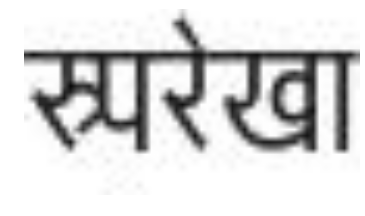

In [48]:
sample = img_to_word.keys()
loc = 2
print i, '\t', img_to_word[sample[loc]], [img_to_word[sample[loc]]], img_to_charunis[sample[loc]]
img = cv2.imread('../dataset/nai_duniya_words/' + sample[loc])            
plt.imshow(img)
plt.axis('off')
plt.show()
print 

In [38]:
font_to_chars_uni_map.keys()[0]

'NGNZCI+ndtext1_0x72'

In [5]:
from matplotlib.ft2font import FT2Font
import matplotlib.font_manager as fm

In [6]:
from PIL import Image, ImageDraw, ImageFont
from random import randint

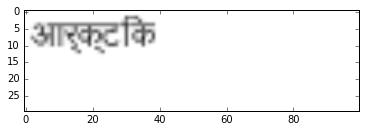

In [7]:
font = ImageFont.FreeTypeFont('/home/sagan/Downloads/Lohit-Devanagari.ttf', layout_engine=ImageFont.LAYOUT_RAQM)
img = Image.new('RGB', (100, 30), color = (255,255,255))
d = ImageDraw.Draw(img)
d.text((1,1), 'आर्क्टिक'.decode('utf-8'), font=font, fill=(0,0,0))
plt.imshow(img)

In [22]:
fin = open('../dataset/parallel/IITB.en-hi.hi','rb')
data = fin.read()
fin.close()

In [23]:
eng = range(97,123) + range(65,91)
unique_words = {}
for line in data.split('\n'):
    for word in line.split():
        if word not in unique_words:
            nword = []
            use = 1
            uword = word.decode('utf-8')
            for c in uword:
                if ord(c) in eng:
                    use = 0
                    break
                else:
                    nword.append(c)
                    
            if use:
                unique_words[''.join(nword)] = 1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


In [24]:
#343612
len(unique_words.keys())

312470

In [16]:
import random
import array

import numpy as np

import cffi_wrapper as cp
import cairocffi
from trimmers import horztrim




In [17]:
def scribe(text, font_style,
           width, height,
           movex, movey,
           twist):

    format = cairocffi.FORMAT_A8
    width = cairocffi.ImageSurface.format_stride_for_width(format, width)
    data = array.array('b', [0] * (height * width))
    surface = cairocffi.ImageSurface(format, width, height, data, width)
    context = cairocffi.Context(surface)
    context.translate(movex, movey)
    context.rotate(twist)

    layout = cp.gobject_ref(cp.pangocairo.pango_cairo_create_layout(context._pointer))
    cp.pango.pango_layout_set_text(layout, text.encode('utf8'), -1)

    font_desc = cp.pango.pango_font_description_from_string(font_style.encode('utf8'))
    cp.pango.pango_layout_set_font_description(layout, font_desc)

    cp.pangocairo.pango_cairo_update_layout(context._pointer, layout)
    cp.pangocairo.pango_cairo_show_layout(context._pointer, layout)

    return np.frombuffer(data, dtype=np.uint8).reshape((height, width))




In [18]:
def scribe_wrapper(text, font_style,
                   height, hbuffer, vbuffer,
                   twist):
    """
    Calcuates the image dimensions from given text and then renders it.
    :param text: Unicode Text
    :param font_style: "Gautami Bold 40", "Mangal Bold Italic 32" etc.
    :param height: Total height of the image.
    :param hbuffer: horizontal margin
    :param vbuffer: vertical margin
    :param twist:  rotation
    :return: an numpy array
    """

    lines = text.split('\n')
    n_lines = len(lines)
    n_letters = max(len(line) for line in lines)
    line_ht = height / (n_lines+1)
    letter_wd = .7 * line_ht
    width = int(round((n_letters+2) * letter_wd))
    
    #print("Lines:", n_lines, "Letters:", n_letters)
    #print("Line Height:", line_ht, " Letter Width:", letter_wd)
    #print("\nFont:{}\nWidth, Height:{} Area={}\nMargins:{}\nRotation:{}".format(
    #    font_style, (width, height), width*height, hbuffer, vbuffer, twist))

    return scribe(text, font_style, width, height, hbuffer, vbuffer, twist)



In [19]:
def slab_print(slab, col_names=None):
    """
    Prints a 'slab' of printed 'text' using ascii.
    :param slab: A matrix of floats from [0, 1]
    """
    if slab.max() > 1:
        slab1 = slab/255.
    else:
        slab1 = slab

    for ir, r in enumerate(slab1):
        print '{:2d}¦'.format(ir)
        for val in r:
            if   val < 0.0:     print '-', 
            elif val < .15:     print ' ', 
            elif val < .35:     print '░', 
            elif val < .65:     print '▒', 
            elif val < .85:     print '▓', 
            elif val <= 1.:     print '█', 
            else:               print '+', 
        print('¦ {}'.format(col_names[ir] if col_names else ''))





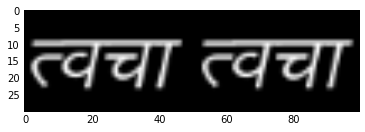

In [20]:
hindi = u"\u0924\u094d\u0935\u091a\u093e \u0924\u094d\u0935\u091a\u093e"
img = scribe_wrapper(hindi, "Devanagri Italic 24", 45, 5, 0, 0)
img = horztrim(img, 3)
img = cv2.resize(img, (100,30))
#slab_print(img)
plt.imshow(img, cmap='gray')

In [28]:
hindi_words = []
class_map = {}
class_no = 1
for k in unique_words.keys():
    use = 1
    for c in k:
        if ord(c) < 2304 or ord(c) > 2431:
            use = 0
        elif c not in class_map:
            class_map[c] = class_no
            class_no += 1
    if use:
        hindi_words.append(k)

In [29]:
len(hindi_words), len(class_map.keys())

(292869, 97)

In [64]:
fout = open('../dataset/parallel/unique_words.pkl','wb')
pickle.dump([hindi_words, class_map], fout)
fout.close()

In [30]:
fin = open('../dataset/parallel/unique_words.pkl','rb')
data = pickle.load(fin)
fin.close()
hindi_words = data[0]
class_map = data[1]

In [31]:
import json

In [37]:
i = 1
desc = {"abc": ''.join(class_map.keys())}
total = []
maxx = 0
minn = 1000
sizes = []
for word in hindi_words:
    img = scribe_wrapper(word, "Devanagri 24", 45, 5, 0, 0)
    img = horztrim(img, 3)
    img = 255 - img
    #cv2.imwrite('../dataset/synthetic_words/data/' + str(i).zfill(10) + '.png', img)
    #total.append({"text":word, "name": str(i).zfill(10) + '.png'})
    #i += 1
    maxx = max(maxx, img.shape[1])
    minn = min(minn, img.shape[1])
    sizes.append(img.shape[1])
    
random.shuffle(total)

desc["train"] = total[:int(0.7*len(total))]
desc["test"] = total[int(0.7*len(total)):]


In [54]:
np.count_nonzero(sizes > 200), sizes.shape[0]

(1822, 292869)

In [68]:

fout = open('../dataset/synthetic_words/desc.json','wb')
json.dump(desc, fout)
fout.close()

अंतरक्षि 	अन्तरका 	नरहरि 	तैयारकी 	केद्रींभूत 	देवीसिंह 	पनेटा 	घाटा 	गृहपरिचारिका 	अनुचर्रसे 	

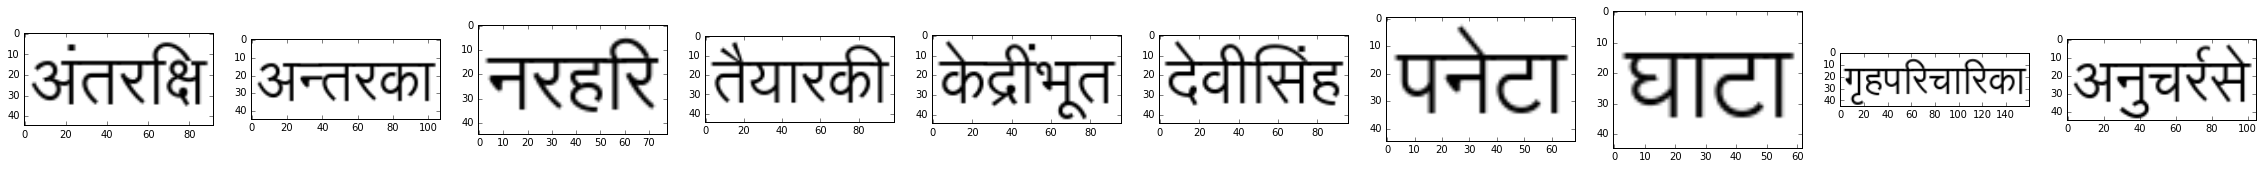


आमलकी 	बॉँये 	हिग्स 	इलाजके 	ग्लॉस्टरशायर 	चाइमबाल 	लिथुआनिया 	अंबु 	औरपैम्फ़लेट 	फैमिलियरायज़ेशन 	

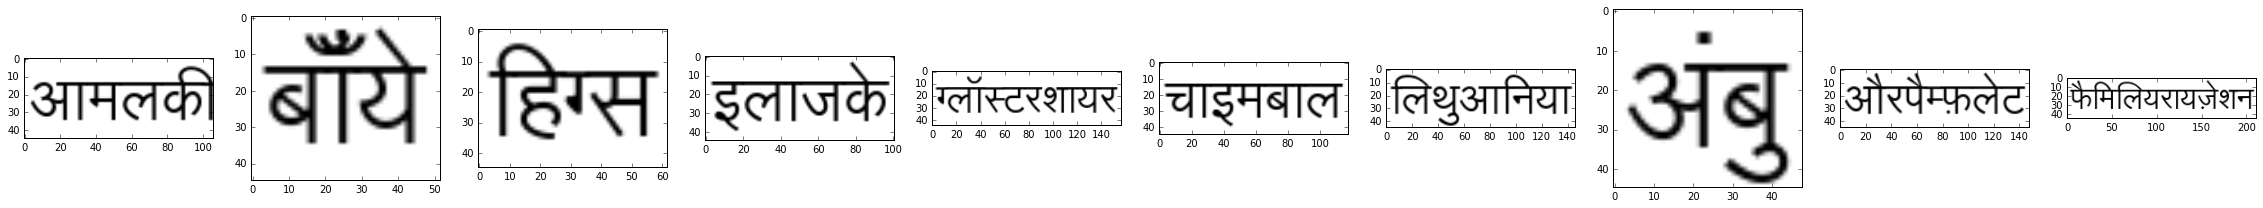


एकाबार 	रेस्पोटरीस 	सिविलेजेशन 	इत्र 	अलंकारशास्त्र 	अशारिरिक 	हूंगी 	स्थानीयजिलाराष्ट्रीय 	इत्न 	कालोचित 	

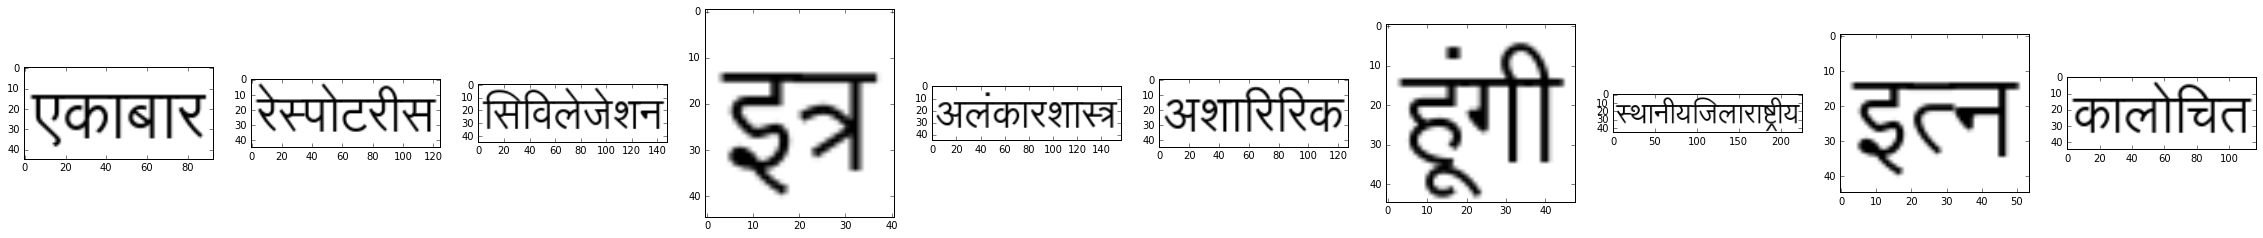


त्रिचुरी 	की्य 	ह्यलोकधर्मी 	खांसते 	मुत्ता 	विद्यावागीश 	हैरिसन 	सगीर 	नौशेर 	जामों 	

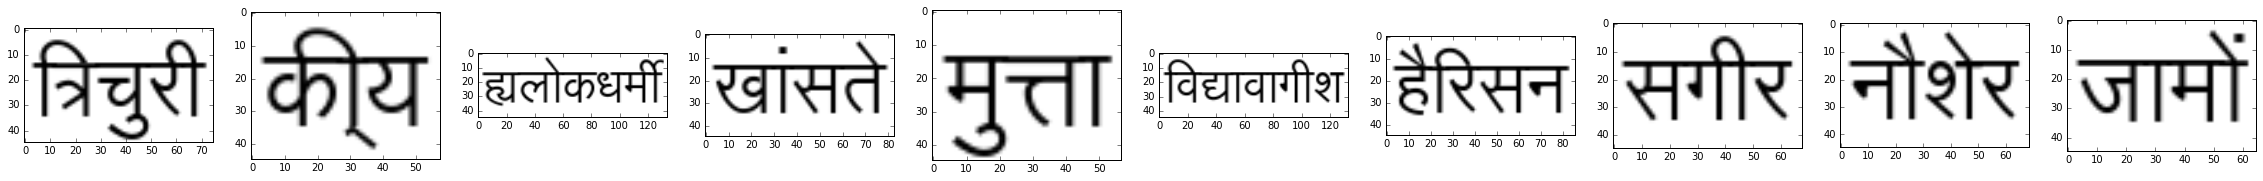


डायनमिक्स 	करारनामें 	ख़न्दाँ 	आर्क्टिक 	सर्पेनस 	रेप्रेज़ेंट 	प्रतिजीविता 	स्वकृत 	अंबर 	अंबल 	

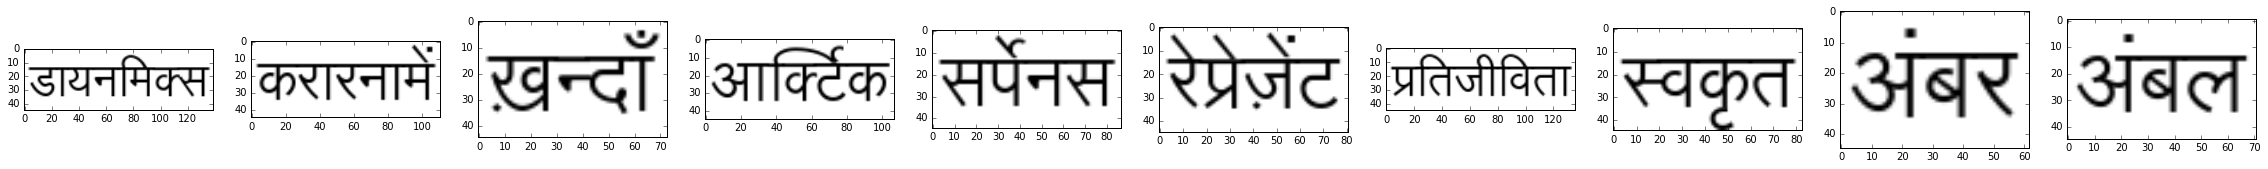


मुँहपड़ा 	लज्ज़त 	टिकारक 	क्षैतिकजः 	भीडऋएभाडऋए 	सलज्ज 	अनुमार्गणीयता 	स्थाशनीय 	गोलाईदार 	विपरीतता 	

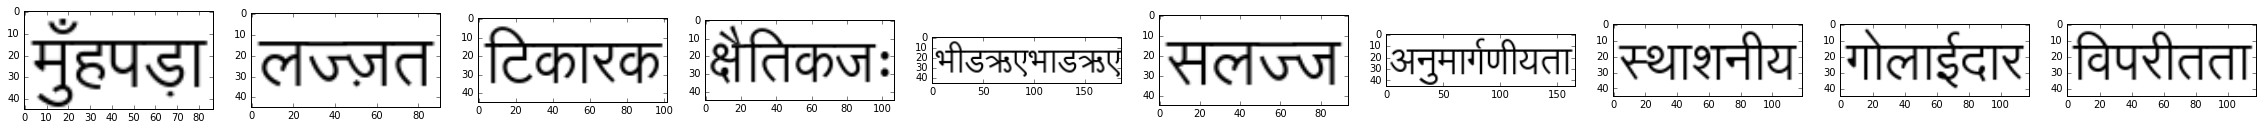


मॅगापोड 	हस्सनंदनी 	अजांत्रिक 	अंबक 	घाटी 	घाटे 	सुनाकर 	कोलीलिथिएसिस 	पिनेटली 	होंगनसूगलु 	

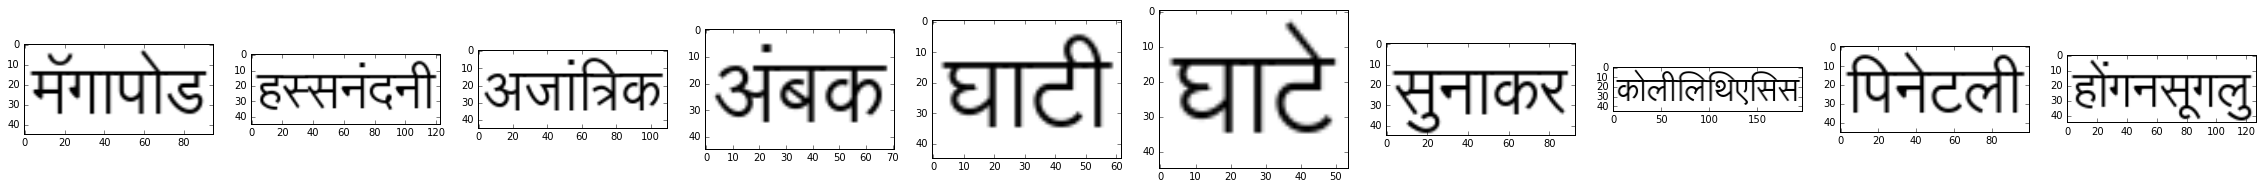


लेपान्टे 	अन्तरकी 	अनुच्छेतद 	अल्प 	छुडऋआया 	संवासियों 	ब्रह्मांडीय 	पिक्सबुफ 	खडकपुर्णा 	ऋन्ङोलिनेहृ 	

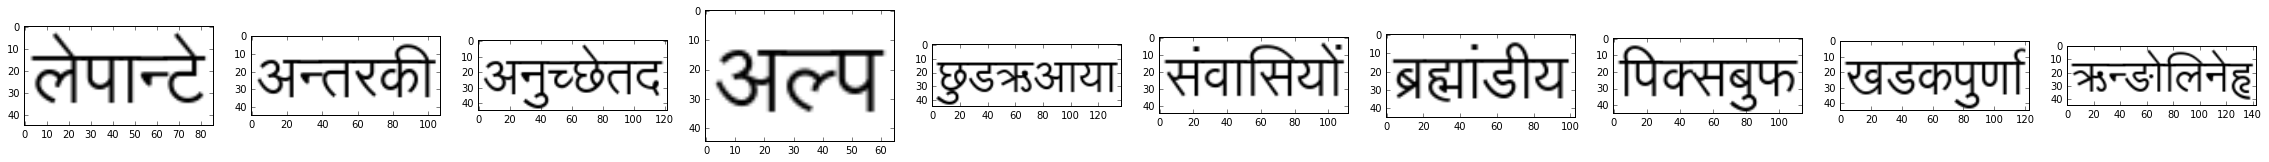


कटकटाहट 	फ़ोर्डाइस 	नॅारवे 	घाटन 	विधायका 	नारेबाजी 	रीसैट 	पिताके 	मरदूद 	स्टैचू 	

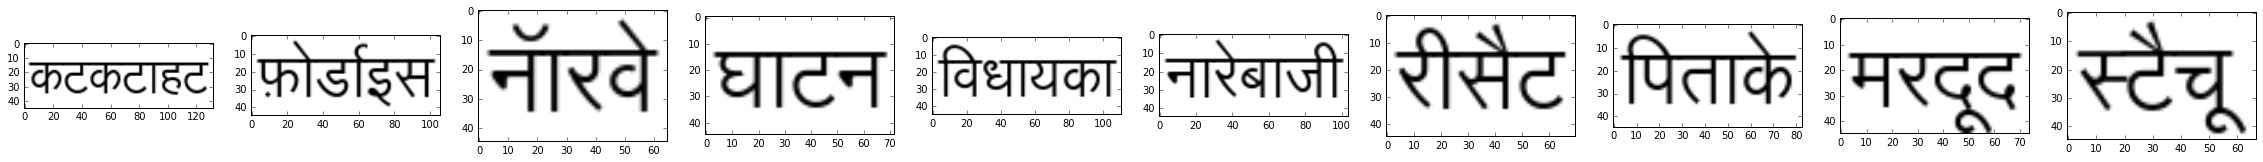


मानध्वंस 	एंजियोस्पर्म 	कौतूकमय 	फेय्न्मन 	इंप्लाँटेशन 	कीमियागरी 	टुटना 	अज्ञानयुक्त 	होंलंबी 	व्याज 	

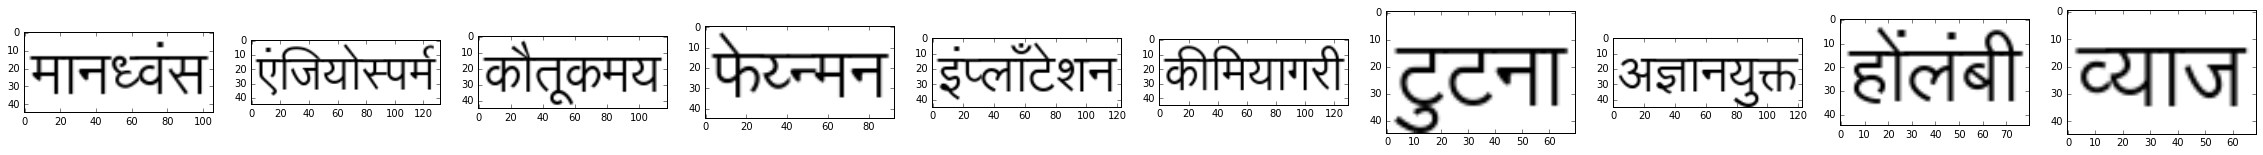

In [27]:
sample = hindi_words[:100]
plt.subplots_adjust(wspace = 0.5)
for i in range(0, len(sample), 10):
    fig = plt.figure(figsize=(40,20))
    for j in range(10):
        if (i + j) < len(sample):
            print sample[i+j], '\t',
            word = sample[i+j]
            img = scribe_wrapper(word, "Devanagri 24", 45, 5, 0, 0)
            img = horztrim(img, 3)
            img = 255 - img
            ax = fig.add_subplot(1, 10, j+1)
            ax.imshow(img, cmap='gray')
    plt.show()
    print 